In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 3
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

In [4]:
df.drop(columns='Id', axis=1, inplace=True)

# Menangani Missing Value

In [5]:
# Menampilkan kolom yang memiliki missing value
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
# Menghitung persentase missing values di setiap kolom
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)
missing_values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [7]:
print(df['PoolQC'].isnull().sum())
print(df['PoolArea'].isnull().sum())
print((df['PoolArea']==0).sum())

1453
0
1453


In [8]:
print(df['MiscFeature'].isnull().sum())
print(df['MiscVal'].isnull().sum())
print((df['MiscVal']==0).sum())

1406
0
1408


In [9]:
df[(df['MiscVal']==0) & (df['MiscFeature'].notnull())][['MiscVal', 'MiscFeature']]

MiscVal MiscFeature
873         0        Othr
1200        0        Shed

In [10]:
# Melihat apakah missing value pada MasVnrArea karena ketiadaan fitur atau karena error data
df[df['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [11]:
# Melihat apakah missing value pada MasVnrArea karena ketiadaan fitur atau karena error data
df[df['MasVnrArea']==0][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[861 rows x 2 columns]

In [12]:
# Melihat banyaknya nilai 0 pada fitur MasVnrArea
(df['MasVnrArea'] == 0).sum()

861

In [13]:
# Melihat banyaknya missing value pada fitur MasVnrType
df['MasVnrType'].isnull().sum()

872

In [14]:
print(df['FireplaceQu'].isnull().sum())
print((df['Fireplaces']==0).sum())

690
690


Melihat missing value dari kedua fitur tersebut, saya menyimpulkan bahwa data yang merupakan missing value ialah data null pada kedua fitur tersebut, sedangkan untuk data yang pada fitur MasVnrType-nya null dan pada fitur MasVnrType-nya 0 merupakan rumah yang tidak memiliki fitur tersebut. Ini berarti ada 8 data yang merupakan error data.

Namun karena ketiadaan fitur terlampau banyak, maka fitur tersebut menjadi tidak efektif dalam memprediksi keseluruhan harga rumah sehingga lebih baik untuk di drop saja.

Begitupun dengan fitur PoolArea, MiscVal, dan FireplaceQu yang mana ketiadaan fitur juga terlampau banyak sehingga lebih baik di drop saja.

In [15]:
df.drop(columns=['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'MasVnrType', 'MasVnrArea', 'FireplaceQu', 'Fireplaces'], axis=1, inplace=True)

Melakukan drop pada fitur PoolQC, MiscFeature, Alley, Fence, MasVnrType, dan MasVnrArea karena memiliki persentase missing value yang tinggi sehingga ditakutkan kurang memiliki pengaruh terhadap harga rumah.

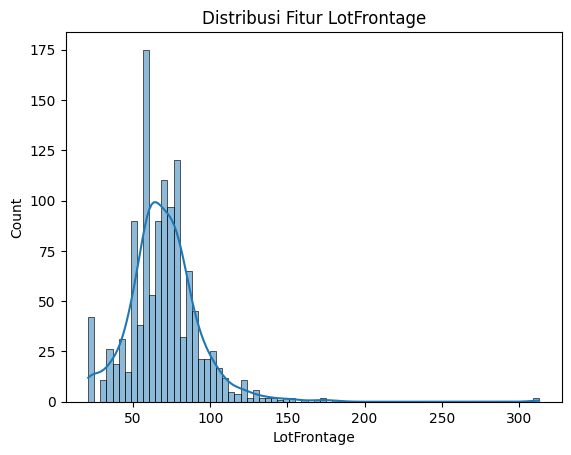

In [16]:
# Visualisasi dari distribusi fitur lotfrontage
sns.histplot(df['LotFrontage'], kde=True)
plt.title('Distribusi Fitur LotFrontage')
plt.show()

In [17]:
median_lotfrontage_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].median()
median_lotfrontage_by_neighborhood

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

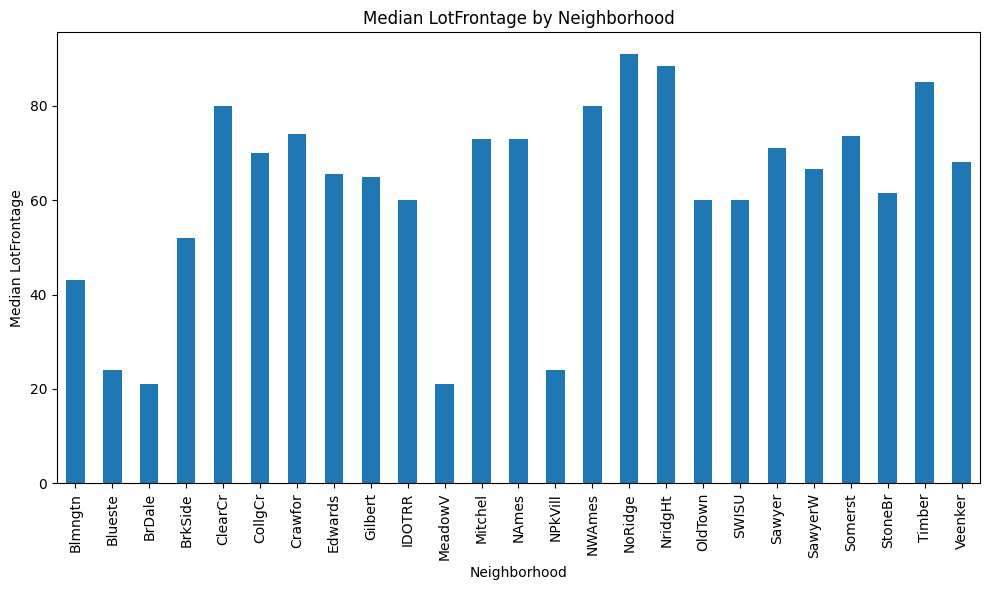

In [18]:
plt.figure(figsize=(10, 6))
median_lotfrontage_by_neighborhood.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Median LotFrontage')
plt.title('Median LotFrontage by Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
# Mengisi missing values pada LotFrontage dengan median berdasarkan Neighborhood
df['LotFrontage'] = df.apply(lambda row: median_lotfrontage_by_neighborhood[row['Neighborhood']] if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis=1)

Mengisi missing values pada LotFrontage dengan median berdasarkan Neighborhood. Ini dilakukan karena median LotFrontage dapat digunakan untuk mengisi missing values dalam fitur ini dengan cara yang lebih representatif dan akurat, mempertimbangkan variasi lokal antar lingkungan, di mana lingkungan rumah sendiri direpresentasikan dengan fitur Neighborhood.

In [20]:
df['GarageType'].isnull().sum()

81

In [21]:
print((df['GarageArea']==0).sum())
print((df['GarageCars']==0).sum())

81
81


In [22]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

In [23]:
# Melihat jumlah nilai 0 pada fitur GarageYrBlt
(df['GarageYrBlt'] == 0).sum()

0

In [24]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

Untuk missing value pada fitur yang berhubungan dengan garasi, nilai null menandakan bahwa rumah tersebut memang tidak memiliki garasi, sehingga nilai null pada fitur-fitur tersebut bukanlah benar-benar missing value, melainkan informasi bahwa rumah tersebut tidak memiliki garasi.

Untuk fitur dengan data kategorikal, kita dapat mengganti nilai null dengan kategori 'No Garage'. Sedangkan untuk fitur dengan data numerik, kita dapat mengganti nilai null dengan nilai 0.

In [25]:
print(df['BsmtFinType1'].isnull().sum())
print(df['BsmtFinType2'].isnull().sum())
print(df['BsmtExposure'].isnull().sum())
print(df['BsmtCond'].isnull().sum())
print(df['BsmtQual'].isnull().sum())

37
38
38
37
37


In [26]:
print((df['BsmtFinSF1']==0).sum())
print((df['BsmtFinSF2']==0).sum())
print((df['BsmtUnfSF']==0).sum())
print((df['TotalBsmtSF']==0).sum())

467
1293
118
37


In [27]:
(df['BsmtExposure']=='No').sum()

953

In [28]:
# Melihat jumlah data yang di mana fitur BsmtExposure-nya ialah gabungan dari NA dan No
((df['BsmtExposure']=='No') | (df['BsmtExposure'].isnull())).sum()

991

In [29]:
print((df['BsmtFinType1']=='Unf').sum())
print((df['BsmtFinType2']=='Unf').sum())

430
1256


In [30]:
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0            706           0        150          856
1            978           0        284         1262
2            486           0        434          920
3            216           0        540          756
4            655           0        490         1145
...          ...         ...        ...          ...
1455           0           0        953          953
1456         790         163        589         1542
1457         275           0        877         1152
1458          49        1029          0         1078
1459         830         290        136         1256

[1460 rows x 4 columns]

In [31]:
df.drop(columns='BsmtExposure', axis=1, inplace=True)

In [32]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')

Sama seperti pada fitur yang berhubungan dengan garage, keempat fitur di atas yang berhubungan dengan basement memiliki missing value yang diartikan bahwa rumah tersebut tidak memiliki basement. Kecuali untuk fitur BsmtExposure, yang di mana ketiadaan fiturnya terlalu banyak, (mencapai 67.87% dari keseluruhan data), sehingga fitur tersebut lebih baik di drop.

Karena fitur yang memiliki missing value merupakan fitur dengan data kategorikal, maka kita ganti nilai nullnya dengan kategori 'No Basement'.

In [33]:
df['Electrical'].isnull().sum()

1

In [34]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

Fitur Electrical merupakan fitur yang merepresentasikan jenis sistem kelistrikan yang ada di rumah. Karena kebanyakan rumah memiliki sistem kelistrikan, missing values pada fitur ini mungkin disebabkan oleh pencatatan yang tidak lengkap. Biasanya, nilai yang paling sering muncul (mode) pada fitur ini adalah nilai default yang baik untuk mengisi missing values.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Reduksi Fitur

In [36]:
for col in sorted(df.columns):
  if col != 'SalePrice':
    print(col)

1stFlrSF
2ndFlrSF
3SsnPorch
BedroomAbvGr
BldgType
BsmtCond
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


In [37]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

In [38]:
df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [39]:
df['OverallScore'] = df['OverallQual'] + df['OverallCond']

In [40]:
df.drop(['OverallQual', 'OverallCond'], axis=1, inplace=True)

In [41]:
df['SaleSeason'] = df['MoSold'].apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall' if x in [9, 10, 11] else 'Winter')

In [42]:
df.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

In [43]:
df['BsmtTotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']

In [44]:
df.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)

In [45]:
df['TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] + df['GrLivArea']
df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['2ndFlrAreaRatio'] = df['2ndFlrSF'] / (df['1stFlrSF'] + df['2ndFlrSF'])

In [46]:
df.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], axis=1, inplace=True)

In [47]:
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['HalfBath'] + df['BsmtHalfBath'])

In [48]:
df.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [49]:
df['GarageQualityScore'] = df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Garage': 0}) + df['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Garage': 0})

In [50]:
df.drop(['GarageQual', 'GarageCond'], axis=1, inplace=True)

In [51]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [52]:
df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [53]:
df['ExterQualityScore'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) + df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [54]:
df.drop(['ExterQual', 'ExterCond'], axis=1, inplace=True)

In [55]:
df['BsmtQualityScore'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0}) + df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})

In [56]:
df.drop(['BsmtQual', 'BsmtCond'], axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   Street              1460 non-null   object 
 5   LotShape            1460 non-null   object 
 6   LandContour         1460 non-null   object 
 7   Utilities           1460 non-null   object 
 8   LotConfig           1460 non-null   object 
 9   LandSlope           1460 non-null   object 
 10  Neighborhood        1460 non-null   object 
 11  Condition1          1460 non-null   object 
 12  Condition2          1460 non-null   object 
 13  BldgType            1460 non-null   object 
 14  HouseStyle          1460 non-null   object 
 15  RoofStyle           1460 non-null   object 
 16  RoofMa

# Menangani Zero Value

In [58]:
# Menghitung persentase nilai 0 di setiap kolom
zero_values = (df == 0).sum() / len(df) * 100
zero_values = zero_values[zero_values > 0]
zero_values.sort_values(ascending=False, inplace=True)
print(zero_values)

Has2ndFlr             56.780822
2ndFlrAreaRatio       56.780822
WoodDeckSF            52.123288
BsmtTotalFinSF        31.986301
TotalPorchSF          31.369863
YearsSinceRemodel      8.493151
BsmtUnfSF              8.082192
GarageAge              5.753425
GarageCars             5.547945
GarageArea             5.547945
GarageQualityScore     5.547945
HouseAge               4.383562
TotalBsmtSF            2.534247
BsmtQualityScore       2.534247
BedroomAbvGr           0.410959
KitchenAbvGr           0.068493
dtype: float64


In [59]:
df.drop(columns=['2ndFlrAreaRatio', 'WoodDeckSF'], axis=1, inplace=True)

In [60]:
print((df['BedroomAbvGr']==0).sum())
print((df['KitchenAbvGr']==0).sum())

6
1


In [61]:
df['BedroomAbvGr'].replace(0, df['BedroomAbvGr'].median(), inplace=True)
df['KitchenAbvGr'].replace(0, df['KitchenAbvGr'].median(), inplace=True)

# Handling Outlier dan Transformasi

In [62]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   Street              1460 non-null   object 
 5   LotShape            1460 non-null   object 
 6   LandContour         1460 non-null   object 
 7   Utilities           1460 non-null   object 
 8   LotConfig           1460 non-null   object 
 9   LandSlope           1460 non-null   object 
 10  Neighborhood        1460 non-null   object 
 11  Condition1          1460 non-null   object 
 12  Condition2          1460 non-null   object 
 13  BldgType            1460 non-null   object 
 14  HouseStyle          1460 non-null   object 
 15  RoofStyle           1460 non-null   object 
 16  RoofMa

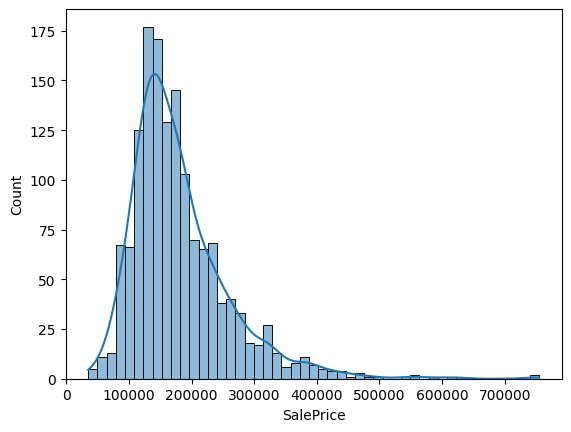

In [64]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()

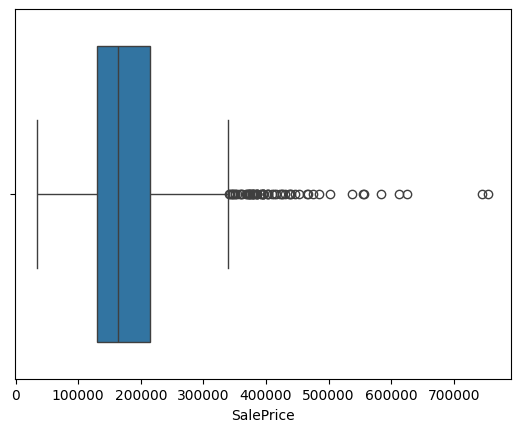

In [65]:
sns.boxplot(x=df['SalePrice'])
plt.show()

In [66]:
# Menentukan batas atas dan bawah outlier menggunakan metode IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan data yang merupakan outlier
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(outliers)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
11            60       RL         85.0    11924   Pave      IR1         Lvl   
53            20       RL         68.0    50271   Pave      IR1         Low   
58            60       RL         66.0    13682   Pave      IR2         HLS   
112           60       RL         77.0     9965   Pave      Reg         Lvl   
151           20       RL        107.0    13891   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1268          50       RL         74.0    14100   Pave      IR1         Lvl   
1353          50       RL         56.0    14720   Pave      IR1         Lvl   
1373          20       RL         91.0    11400   Pave      Reg         Lvl   
1388          20       RL         42.0    14892   Pave      IR1         HLS   
1437          20       RL         96.0    12444   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OverallScor

In [67]:
df_log = df.copy()
df_log['SalePrice'] = np.log1p(df_log['SalePrice'])

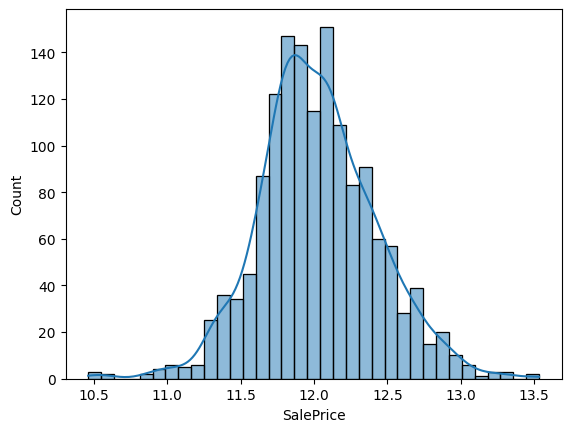

In [68]:
sns.histplot(df_log['SalePrice'], kde=True)
plt.show()

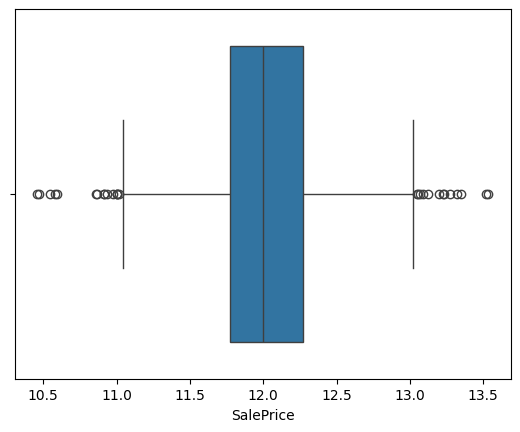

In [69]:
sns.boxplot(x=df_log['SalePrice'])
plt.show()

In [70]:
Q1 = df_log['SalePrice'].quantile(0.25)
Q3 = df_log['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_log = df_log[(df_log['SalePrice'] < lower_bound) | (df_log['SalePrice'] > upper_bound)]
print(outliers_log)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
178           20       RL         63.0    17423   Pave      IR1         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
375           30       RL         65.5    10020   Pave      IR1         Low   
410           20       RL         68.0     9571   Pave      Reg         Lvl   
440           20       RL        105.0    15431   Pave      Reg         Lvl   
495           30  C (all)         60.0     7879   Pave      Reg         Lvl   
533           20       RL         50.0     5000   Pave      Reg         Low   
636           30       RM         51.0     6120   Pave      Reg         Lvl   
691           60       RL        104.0    21535   Pave      IR1         Lvl   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
710           30       RL         56.0     4130   Pa

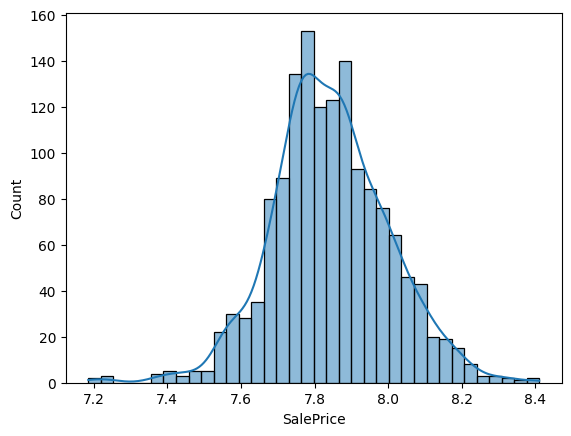

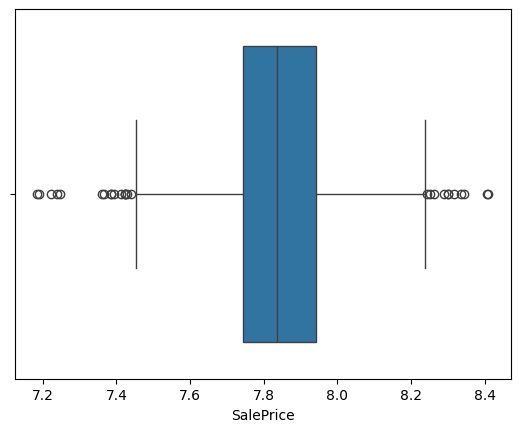

In [71]:
from scipy.stats import boxcox

# Lakukan transformasi Box-Cox pada SalePrice
df_boxcox = df.copy()
df_boxcox['SalePrice'], lambda_boxcox = boxcox(df_boxcox['SalePrice'])

# Visualisasikan distribusi setelah transformasi Box-Cox
sns.histplot(df_boxcox['SalePrice'], kde=True)
plt.show()

# Periksa outlier setelah transformasi Box-Cox
sns.boxplot(x=df_boxcox['SalePrice'])
plt.show()

In [72]:
Q1 = df_boxcox['SalePrice'].quantile(0.25)
Q3 = df_boxcox['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_boxcox = df_boxcox[(df_boxcox['SalePrice'] < lower_bound) | (df_boxcox['SalePrice'] > upper_bound)]
print(outliers_boxcox)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
178           20       RL         63.0    17423   Pave      IR1         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
375           30       RL         65.5    10020   Pave      IR1         Low   
410           20       RL         68.0     9571   Pave      Reg         Lvl   
440           20       RL        105.0    15431   Pave      Reg         Lvl   
462           20       RL         60.0     8281   Pave      IR1         Lvl   
495           30  C (all)         60.0     7879   Pave      Reg         Lvl   
533           20       RL         50.0     5000   Pave      Reg         Low   
636           30       RM         51.0     6120   Pave      Reg         Lvl   
691           60       RL        104.0    21535   Pave      IR1         Lvl   
705          190       RM         70.0     5600   Pa

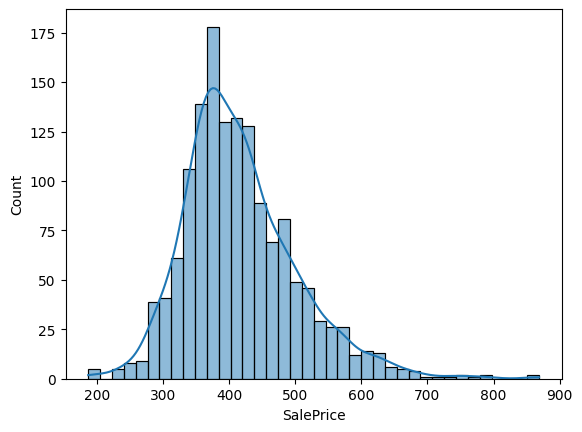

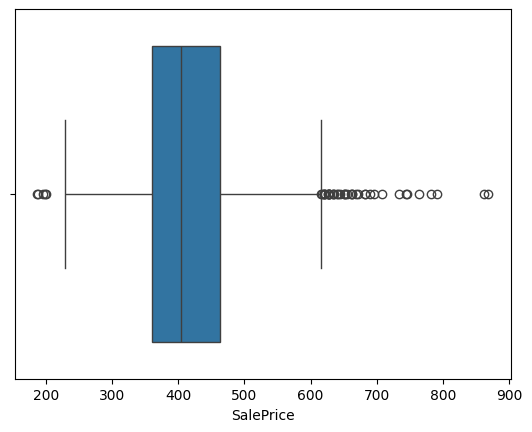

In [73]:
# Lakukan transformasi akar kuadrat pada SalePrice
df_sqrt = df.copy()
df_sqrt['SalePrice'] = np.sqrt(df_sqrt['SalePrice'])

# Visualisasikan distribusi setelah transformasi akar kuadrat
sns.histplot(df_sqrt['SalePrice'], kde=True)
plt.show()

# Periksa outlier setelah transformasi akar kuadrat
sns.boxplot(x=df_sqrt['SalePrice'])
plt.show()

In [74]:
Q1 = df_sqrt['SalePrice'].quantile(0.25)
Q3 = df_sqrt['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sqrt = df_sqrt[(df_sqrt['SalePrice'] < lower_bound) | (df_sqrt['SalePrice'] > upper_bound)]
print(outliers_sqrt)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
53            20       RL         68.0    50271   Pave      IR1         Low   
58            60       RL         66.0    13682   Pave      IR2         HLS   
112           60       RL         77.0     9965   Pave      Reg         Lvl   
161           60       RL        110.0    13688   Pave      IR1         Lvl   
178           20       RL         63.0    17423   Pave      IR1         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
224           20       RL        103.0    13472   Pave      Reg         Lvl   
231           60       RL        174.0    15138   Pave      IR1         Lvl   
278           20       RL        107.0    14450   Pave      Reg         Lvl   
349           60       RL         56.0    20431   Pave      IR2         Lvl   
378           20       RL         88.0    11394   Pa

# Encoding Fitur Kategorikal

In [75]:
df_log.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition',
       'SaleSeason'],
      dtype='object')

In [76]:
for col in df_log.select_dtypes(include=['object']).columns:
  print(col, df_log[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [77]:
df_log = pd.get_dummies(df_log, columns=['MSZoning'])
df_log['Street'] = df_log['Street'].map({'Pave': 0, 'Grvl': 1})
df_log['LotShape'] = df_log['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
df_log = pd.get_dummies(df_log, columns=['LandContour'])
df_log['Utilities'] = df_log['Utilities'].map({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1})
df_log = pd.get_dummies(df_log, columns=['LotConfig'])
df_log['LandSlope'] = df_log['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
df_log['Condition1'] = df_log['Condition1'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_log['Condition2'] = df_log['Condition2'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_log['BldgType'] = df_log['BldgType'].map({'Twnhs': 1, 'TwnhsE': 2, 'Duplex': 3, '2fmCon': 4, '1Fam': 5})
df_log['HouseStyle'] = df_log['HouseStyle'].map({'SLvl': 1, 'SFoyer': 2, '2.5Unf': 3, '2.5Fin': 4, '2Story': 5, '1.5Unf': 6, '1.5Fin': 7, '1Story': 8})
df_log['RoofStyle'] = df_log['RoofStyle'].map({'Shed': 1, 'Mansard': 2, 'Hip': 3, 'Gambrel': 4, 'Gable': 5, 'Flat': 6})
df_log['RoofMatl'] = df_log['RoofMatl'].map({'WdShngl': 1, 'WdShake': 2, 'Tar&Grv': 3, 'Roll': 4, 'Metal': 5, 'Membran': 6, 'CompShg': 7, 'ClyTile': 8})
df_log['Exterior1st'] = df_log['Exterior1st'].map({'WdShing': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CemntBd': 12, 'CBlock': 13, 'BrkFace': 14, 'BrkComm': 15, 'AsphShn': 16, 'AsbShng': 17})
df_log['Exterior2nd'] = df_log['Exterior2nd'].map({'Wd Shng': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CmentBd': 12, 'CBlock': 13, 'BrkFace': 14, 'Brk Cmn': 15, 'AsphShn': 16, 'AsbShng': 17})
df_log['Foundation'] = df_log['Foundation'].map({'Wood': 1, 'Stone': 2, 'Slab': 3, 'PConc': 4, 'CBlock': 5, 'BrkTil': 6})
df_log['BsmtFinType1'] = df_log['BsmtFinType1'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_log['BsmtFinType2'] = df_log['BsmtFinType2'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_log['Heating'] = df_log['Heating'].map({'Wall': 1, 'OthW': 2, 'Grav': 3, 'GasW': 4, 'GasA': 5, 'Floor': 6})
df_log['HeatingQC'] = df_log['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_log['CentralAir'] = df_log['CentralAir'].map({'N': 0, 'Y': 1})
df_log['Electrical'] = df_log['Electrical'].map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
df_log['KitchenQual'] = df_log['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_log['Functional'] = df_log['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1})
df_log['GarageType'] = df_log['GarageType'].map({'No Garage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})
df_log['GarageFinish'] = df_log['GarageFinish'].map({'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_log['PavedDrive'] = df_log['PavedDrive'].map({'N': 1, 'P': 2, 'Y': 3})
df_log['SaleType'] = df_log['SaleType'].map({'Oth': 1, 'ConLD': 2, 'ConLI': 3, 'ConLw': 4, 'Con': 5, 'COD': 6, 'New': 7, 'VWD': 8, 'CWD': 9, 'WD': 10})
df_log['SaleCondition'] = df_log['SaleCondition'].map({'Normal': 6, 'Abnorml': 5, 'AdjLand': 4, 'Alloca': 3, 'Family': 2, 'Partial': 1})
df_log = pd.get_dummies(df_log, columns=['SaleSeason'])

In [78]:
df_boxcox = pd.get_dummies(df_boxcox, columns=['MSZoning'])
df_boxcox['Street'] = df_boxcox['Street'].map({'Pave': 0, 'Grvl': 1})
df_boxcox['LotShape'] = df_boxcox['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
df_boxcox = pd.get_dummies(df_boxcox, columns=['LandContour'])
df_boxcox['Utilities'] = df_boxcox['Utilities'].map({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1})
df_boxcox = pd.get_dummies(df_boxcox, columns=['LotConfig'])
df_boxcox['LandSlope'] = df_boxcox['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
df_boxcox['Condition1'] = df_boxcox['Condition1'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_boxcox['Condition2'] = df_boxcox['Condition2'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_boxcox['BldgType'] = df_boxcox['BldgType'].map({'Twnhs': 1, 'TwnhsE': 2, 'Duplex': 3, '2fmCon': 4, '1Fam': 5})
df_boxcox['HouseStyle'] = df_boxcox['HouseStyle'].map({'SLvl': 1, 'SFoyer': 2, '2.5Unf': 3, '2.5Fin': 4, '2Story': 5, '1.5Unf': 6, '1.5Fin': 7, '1Story': 8})
df_boxcox['RoofStyle'] = df_boxcox['RoofStyle'].map({'Shed': 1, 'Mansard': 2, 'Hip': 3, 'Gambrel': 4, 'Gable': 5, 'Flat': 6})
df_boxcox['RoofMatl'] = df_boxcox['RoofMatl'].map({'WdShngl': 1, 'WdShake': 2, 'Tar&Grv': 3, 'Roll': 4, 'Metal': 5, 'Membran': 6, 'CompShg': 7, 'ClyTile': 8})
df_boxcox['Exterior1st'] = df_boxcox['Exterior1st'].map({'WdShing': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CemntBd': 12, 'CBlock': 13, 'BrkFace': 14, 'BrkComm': 15, 'AsphShn': 16, 'AsbShng': 17})
df_boxcox['Exterior2nd'] = df_boxcox['Exterior2nd'].map({'Wd Shng': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CmentBd': 12, 'CBlock': 13, 'BrkFace': 14, 'Brk Cmn': 15, 'AsphShn': 16, 'AsbShng': 17})
df_boxcox['Foundation'] = df_boxcox['Foundation'].map({'Wood': 1, 'Stone': 2, 'Slab': 3, 'PConc': 4, 'CBlock': 5, 'BrkTil': 6})
df_boxcox['BsmtFinType1'] = df_boxcox['BsmtFinType1'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_boxcox['BsmtFinType2'] = df_boxcox['BsmtFinType2'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_boxcox['Heating'] = df_boxcox['Heating'].map({'Wall': 1, 'OthW': 2, 'Grav': 3, 'GasW': 4, 'GasA': 5, 'Floor': 6})
df_boxcox['HeatingQC'] = df_boxcox['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_boxcox['CentralAir'] = df_boxcox['CentralAir'].map({'N': 0, 'Y': 1})
df_boxcox['Electrical'] = df_boxcox['Electrical'].map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
df_boxcox['KitchenQual'] = df_boxcox['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_boxcox['Functional'] = df_boxcox['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1})
df_boxcox['GarageType'] = df_boxcox['GarageType'].map({'No Garage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})
df_boxcox['GarageFinish'] = df_boxcox['GarageFinish'].map({'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_boxcox['PavedDrive'] = df_boxcox['PavedDrive'].map({'N': 1, 'P': 2, 'Y': 3})
df_boxcox['SaleType'] = df_boxcox['SaleType'].map({'Oth': 1, 'ConLD': 2, 'ConLI': 3, 'ConLw': 4, 'Con': 5, 'COD': 6, 'New': 7, 'VWD': 8, 'CWD': 9, 'WD': 10})
df_boxcox['SaleCondition'] = df_boxcox['SaleCondition'].map({'Normal': 6, 'Abnorml': 5, 'AdjLand': 4, 'Alloca': 3, 'Family': 2, 'Partial': 1})
df_boxcox = pd.get_dummies(df_boxcox, columns=['SaleSeason'])

In [79]:
df_sqrt = pd.get_dummies(df_sqrt, columns=['MSZoning'])
df_sqrt['Street'] = df_sqrt['Street'].map({'Pave': 0, 'Grvl': 1})
df_sqrt['LotShape'] = df_sqrt['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
df_sqrt = pd.get_dummies(df_sqrt, columns=['LandContour'])
df_sqrt['Utilities'] = df_sqrt['Utilities'].map({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1})
df_sqrt = pd.get_dummies(df_sqrt, columns=['LotConfig'])
df_sqrt['LandSlope'] = df_sqrt['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
df_sqrt['Condition1'] = df_sqrt['Condition1'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_sqrt['Condition2'] = df_sqrt['Condition2'].map({'Artery': 9, 'Feedr': 8, 'Norm': 7, 'RRNn': 6, 'RRAn': 5, 'PosN': 4, 'PosA': 3, 'RRNe': 2, 'RRAe': 1})
df_sqrt['BldgType'] = df_sqrt['BldgType'].map({'Twnhs': 1, 'TwnhsE': 2, 'Duplex': 3, '2fmCon': 4, '1Fam': 5})
df_sqrt['HouseStyle'] = df_sqrt['HouseStyle'].map({'SLvl': 1, 'SFoyer': 2, '2.5Unf': 3, '2.5Fin': 4, '2Story': 5, '1.5Unf': 6, '1.5Fin': 7, '1Story': 8})
df_sqrt['RoofStyle'] = df_sqrt['RoofStyle'].map({'Shed': 1, 'Mansard': 2, 'Hip': 3, 'Gambrel': 4, 'Gable': 5, 'Flat': 6})
df_sqrt['RoofMatl'] = df_sqrt['RoofMatl'].map({'WdShngl': 1, 'WdShake': 2, 'Tar&Grv': 3, 'Roll': 4, 'Metal': 5, 'Membran': 6, 'CompShg': 7, 'ClyTile': 8})
df_sqrt['Exterior1st'] = df_sqrt['Exterior1st'].map({'WdShing': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CemntBd': 12, 'CBlock': 13, 'BrkFace': 14, 'BrkComm': 15, 'AsphShn': 16, 'AsbShng': 17})
df_sqrt['Exterior2nd'] = df_sqrt['Exterior2nd'].map({'Wd Shng': 1, 'Wd Sdng': 2, 'VinylSd': 3, 'Stucco': 4, 'Stone': 5, 'PreCast': 6, 'Plywood': 7, 'Other': 8, 'MetalSd': 9, 'ImStucc': 10, 'HdBoard': 11, 'CmentBd': 12, 'CBlock': 13, 'BrkFace': 14, 'Brk Cmn': 15, 'AsphShn': 16, 'AsbShng': 17})
df_sqrt['Foundation'] = df_sqrt['Foundation'].map({'Wood': 1, 'Stone': 2, 'Slab': 3, 'PConc': 4, 'CBlock': 5, 'BrkTil': 6})
df_sqrt['BsmtFinType1'] = df_sqrt['BsmtFinType1'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_sqrt['BsmtFinType2'] = df_sqrt['BsmtFinType2'].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_sqrt['Heating'] = df_sqrt['Heating'].map({'Wall': 1, 'OthW': 2, 'Grav': 3, 'GasW': 4, 'GasA': 5, 'Floor': 6})
df_sqrt['HeatingQC'] = df_sqrt['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_sqrt['CentralAir'] = df_sqrt['CentralAir'].map({'N': 0, 'Y': 1})
df_sqrt['Electrical'] = df_sqrt['Electrical'].map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
df_sqrt['KitchenQual'] = df_sqrt['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_sqrt['Functional'] = df_sqrt['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1})
df_sqrt['GarageType'] = df_sqrt['GarageType'].map({'No Garage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})
df_sqrt['GarageFinish'] = df_sqrt['GarageFinish'].map({'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_sqrt['PavedDrive'] = df_sqrt['PavedDrive'].map({'N': 1, 'P': 2, 'Y': 3})
df_sqrt['SaleType'] = df_sqrt['SaleType'].map({'Oth': 1, 'ConLD': 2, 'ConLI': 3, 'ConLw': 4, 'Con': 5, 'COD': 6, 'New': 7, 'VWD': 8, 'CWD': 9, 'WD': 10})
df_sqrt['SaleCondition'] = df_sqrt['SaleCondition'].map({'Normal': 6, 'Abnorml': 5, 'AdjLand': 4, 'Alloca': 3, 'Family': 2, 'Partial': 1})
df_sqrt = pd.get_dummies(df_sqrt, columns=['SaleSeason'])

In [80]:
df_log.drop(columns='Neighborhood', axis=1, inplace=True)
df_boxcox.drop(columns='Neighborhood', axis=1, inplace=True)
df_sqrt.drop(columns='Neighborhood', axis=1, inplace=True)

In [81]:
for col in df_log.select_dtypes(include=['bool']).columns:
  df_log[col] = df_log[col].astype(int)

In [82]:
for col in df_boxcox.select_dtypes(include=['bool']).columns:
  df_boxcox[col] = df_boxcox[col].astype(int)

In [83]:
for col in df_sqrt.select_dtypes(include=['bool']).columns:
  df_sqrt[col] = df_sqrt[col].astype(int)

In [84]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1460 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   Street              1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   Utilities           1460 non-null   int64  
 6   LandSlope           1460 non-null   int64  
 7   Condition1          1460 non-null   int64  
 8   Condition2          1460 non-null   int64  
 9   BldgType            1460 non-null   int64  
 10  HouseStyle          1460 non-null   int64  
 11  RoofStyle           1460 non-null   int64  
 12  RoofMatl            1460 non-null   int64  
 13  Exterior1st         1460 non-null   int64  
 14  Exterior2nd         1460 non-null   int64  
 15  Foundation          1460 non-null   int64  
 16  BsmtFi

# Feature Selection

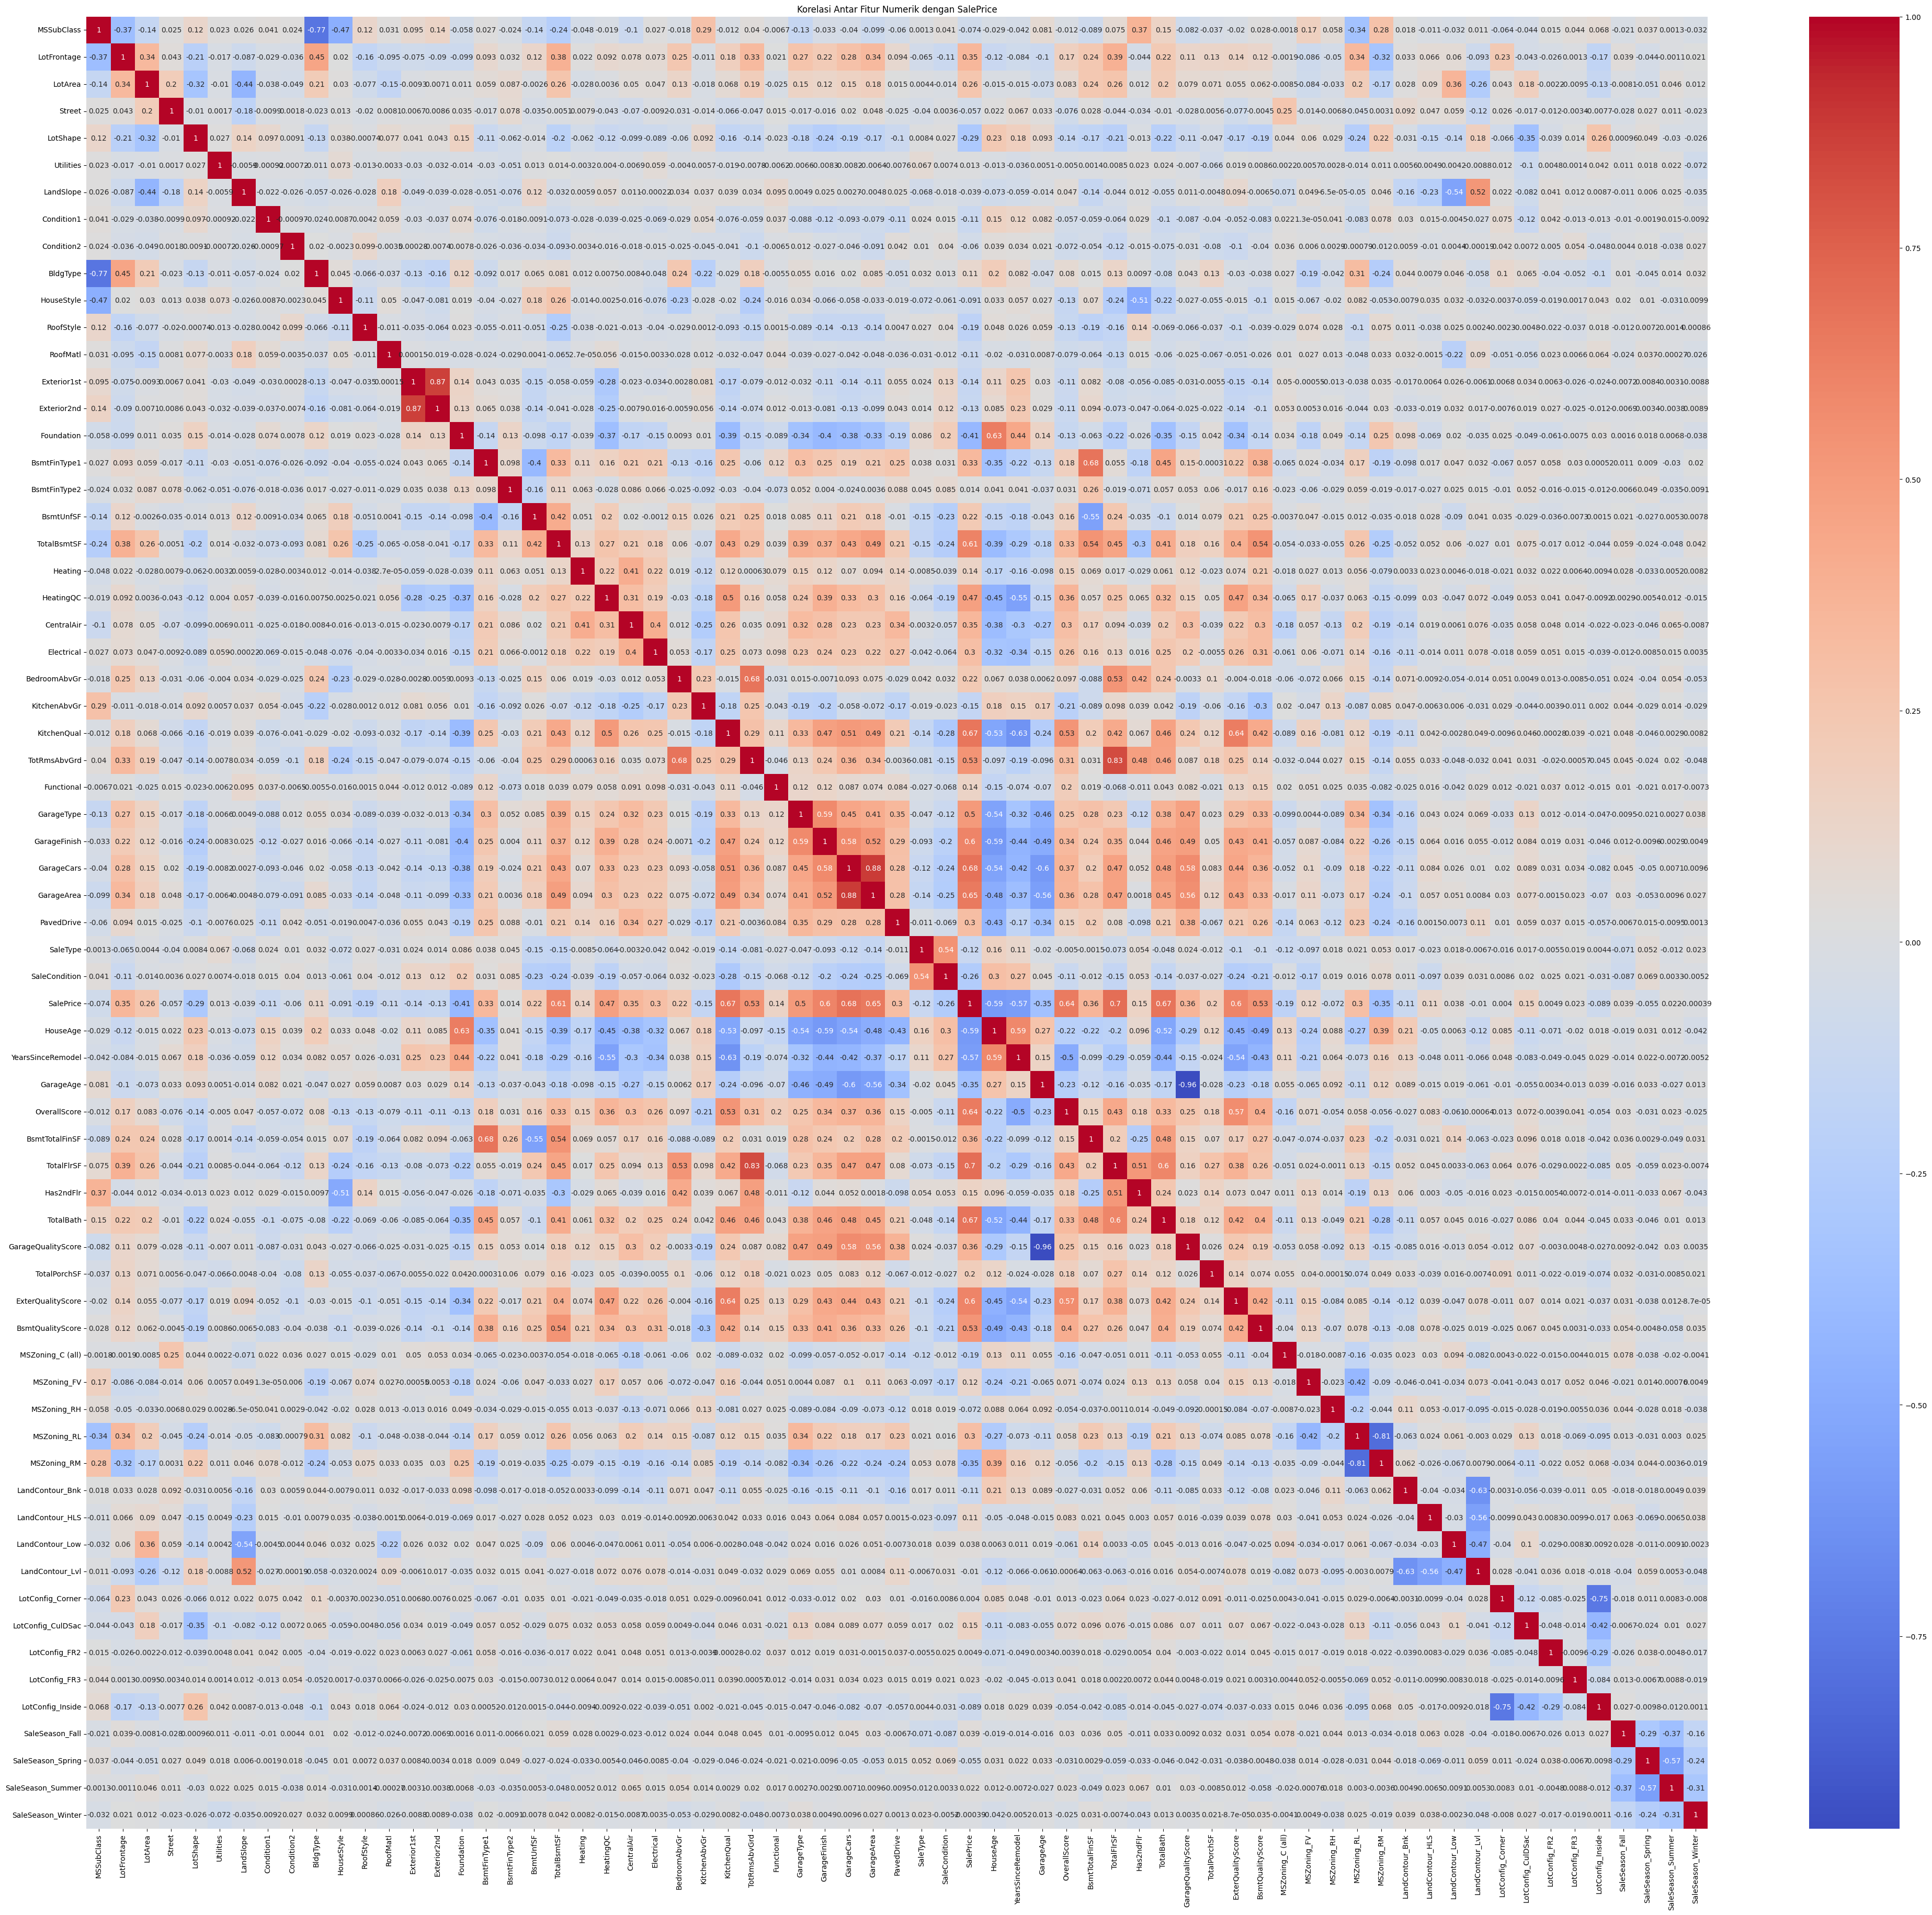

In [85]:
# Melihat korelasi antar fitur numerik dengan SalePrice
plt.figure(figsize=(50, 45))
correlation_matrix = df_log.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik dengan SalePrice')
plt.show()

In [86]:
# Melihat seluruh fitur yang korelasinya lebih dari 0.5
high_corr_features = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].index.tolist()
print(high_corr_features)

['TotalBsmtSF', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice', 'HouseAge', 'YearsSinceRemodel', 'OverallScore', 'TotalFlrSF', 'TotalBath', 'ExterQualityScore', 'BsmtQualityScore']


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF untuk setiap fitur
vif = pd.DataFrame()
vif["Variable"] = df_log.drop('SalePrice', axis=1).columns
vif["VIF"] = [variance_inflation_factor(df_log.drop('SalePrice', axis=1).values, i) for i in range(df_log.drop('SalePrice', axis=1).shape[1])]

# Mengurutkan berdasarkan VIF terbesar
vif_sorted = vif.sort_values(by='VIF', ascending=False)
vif_sorted

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero

Variable       VIF
65  SaleSeason_Winter       inf
55    LandContour_Low       inf
48   MSZoning_C (all)       inf
19        TotalBsmtSF       inf
18          BsmtUnfSF       inf
..                ...       ...
28         Functional  1.185009
12           RoofMatl  1.154794
7          Condition1  1.094747
8          Condition2  1.089614
5           Utilities  1.071500

[66 rows x 2 columns]

In [88]:
print((df_log['TotalBsmtSF']==0).sum())
print((df_log['BsmtUnfSF']==0).sum())
print((df_log['BsmtTotalFinSF']==0).sum())

37
118
467


In [89]:
# Menghitung VIF untuk setiap fitur kecuali BsmtTotalFinSF dan GarageAge
vif = pd.DataFrame()
vif["Variable"] = df_log.drop(['SalePrice', 'BsmtTotalFinSF', 'GarageAge'], axis=1).columns
vif["VIF"] = [variance_inflation_factor(df_log.drop(['SalePrice', 'BsmtTotalFinSF', 'GarageAge'], axis=1).values, i) for i in range(df_log.drop(['SalePrice', 'BsmtTotalFinSF', 'GarageAge'], axis=1).shape[1])]

# Mengurutkan berdasarkan VIF terbesar
vif_sorted = vif.sort_values(by='VIF', ascending=False)
vif_sorted

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero

Variable       VIF
63  SaleSeason_Winter       inf
54    LandContour_Lvl       inf
47        MSZoning_FV       inf
48        MSZoning_RH       inf
49        MSZoning_RL       inf
..                ...       ...
28         Functional  1.184422
12           RoofMatl  1.152633
7          Condition1  1.094075
8          Condition2  1.089484
5           Utilities  1.071318

[64 rows x 2 columns]

In [90]:
df_log.drop(columns=['BsmtTotalFinSF', 'GarageAge'], axis=1, inplace=True)
df_boxcox.drop(columns=['BsmtTotalFinSF', 'GarageAge'], axis=1, inplace=True)
df_sqrt.drop(columns=['BsmtTotalFinSF', 'GarageAge'], axis=1, inplace=True)

Karena fitur BsmtTotalFinSF memiliki banyak nilai 0, maka fitur tersebut harus di drop agar VIF dari fitur TotalBsmtSF dan BsmtUnfSF tidak lebih dari 10 sehingga menyebabkan multicolinearity.

Selain itu, fitur GarageAge dan GarageQualityScore memiliki nilai VIF yang lebih besar dari 10 yang menandakan multicolinearity. Salah satu harus di drop. Karena korelasi fitur GarageQualityScore terhadap SalePrice lebih tinggi daripada korelasi fitur GarageAge terhadap SalePrice, maka yang akan didrop ialah fitur GarageAge.

Untuk VIF yang memiliki nilai infinity namun merupakan fitur kategorikal, biarkan saja karena efek dari one hot encoder sebelumnya yang menyebabkan banyaknya nilai 0 pada fitur-fitur tersebut sehingga nilai VIF-nya infinity.

In [91]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1460 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   Street              1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   Utilities           1460 non-null   int64  
 6   LandSlope           1460 non-null   int64  
 7   Condition1          1460 non-null   int64  
 8   Condition2          1460 non-null   int64  
 9   BldgType            1460 non-null   int64  
 10  HouseStyle          1460 non-null   int64  
 11  RoofStyle           1460 non-null   int64  
 12  RoofMatl            1460 non-null   int64  
 13  Exterior1st         1460 non-null   int64  
 14  Exterior2nd         1460 non-null   int64  
 15  Foundation          1460 non-null   int64  
 16  BsmtFi

In [92]:
df_boxcox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1460 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   Street              1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   Utilities           1460 non-null   int64  
 6   LandSlope           1460 non-null   int64  
 7   Condition1          1460 non-null   int64  
 8   Condition2          1460 non-null   int64  
 9   BldgType            1460 non-null   int64  
 10  HouseStyle          1460 non-null   int64  
 11  RoofStyle           1460 non-null   int64  
 12  RoofMatl            1460 non-null   int64  
 13  Exterior1st         1460 non-null   int64  
 14  Exterior2nd         1460 non-null   int64  
 15  Foundation          1460 non-null   int64  
 16  BsmtFi

In [93]:
df_sqrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1460 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   Street              1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   Utilities           1460 non-null   int64  
 6   LandSlope           1460 non-null   int64  
 7   Condition1          1460 non-null   int64  
 8   Condition2          1460 non-null   int64  
 9   BldgType            1460 non-null   int64  
 10  HouseStyle          1460 non-null   int64  
 11  RoofStyle           1460 non-null   int64  
 12  RoofMatl            1460 non-null   int64  
 13  Exterior1st         1460 non-null   int64  
 14  Exterior2nd         1460 non-null   int64  
 15  Foundation          1460 non-null   int64  
 16  BsmtFi

# Splitting Data

In [94]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
x_log = df_log.drop('SalePrice', axis=1)
y_log = df_log['SalePrice']
x_boxcox = df_boxcox.drop('SalePrice', axis=1)
y_boxcox = df_boxcox['SalePrice']
x_sqrt = df_sqrt.drop('SalePrice', axis=1)
y_sqrt = df_sqrt['SalePrice']

# Membagi data menjadi data latih dan data uji (80:20)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=42)
x_train_boxcox, x_test_boxcox, y_train_boxcox, y_test_boxcox = train_test_split(x_boxcox, y_boxcox, test_size=0.2, random_state=42)
x_train_sqrt, x_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(x_sqrt, y_sqrt, test_size=0.2, random_state=42)

# Modelling

In [95]:
from sklearn.preprocessing import StandardScaler
from scipy.special import inv_boxcox
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)

In [96]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_log)
x_test_scaled = scaler.transform(x_test_log)

In [98]:
def evaluate_models_log_data(x_train, x_test, y_train, y_test, x_train_scaled, x_test_scaled):
  results = {}

  # Linear Regression (using scaled data)
  lr_model = LinearRegression()
  lr_model.fit(x_train_scaled, y_train)
  y_pred_train_lr = lr_model.predict(x_train_scaled)
  y_pred_train_lr_exp = np.expm1(y_pred_train_lr)
  y_pred_test_lr = lr_model.predict(x_test_scaled)
  y_pred_test_lr_exp = np.expm1(y_pred_test_lr)
  results['Linear Regression Log Data'] = {
      'R-squared Train': r2_score(np.expm1(y_train), y_pred_train_lr_exp),
      'R-squared Test': r2_score(np.expm1(y_test), y_pred_test_lr_exp),
      'MAE Train': mean_absolute_error(np.expm1(y_train), y_pred_train_lr_exp),
      'MAE Test': mean_absolute_error(np.expm1(y_test), y_pred_test_lr_exp),
      'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train), y_pred_train_lr_exp)),
      'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_test_lr_exp))
  }

  # Decision Tree Regressor
  dt_model = DecisionTreeRegressor(random_state=42)
  dt_model.fit(x_train, y_train)
  y_pred_train_dt = dt_model.predict(x_train)
  y_pred_train_dt_exp = np.expm1(y_pred_train_dt)
  y_pred_test_dt = dt_model.predict(x_test_log)
  y_pred_test_dt_exp = np.expm1(y_pred_test_dt)
  results['Decision Tree Regressor Log Data'] = {
      'R-squared Train': r2_score(np.expm1(y_train), y_pred_train_dt_exp),
      'R-squared Test': r2_score(np.expm1(y_test), y_pred_test_dt_exp),
      'MAE Train': mean_absolute_error(np.expm1(y_train), y_pred_train_dt_exp),
      'MAE Test': mean_absolute_error(np.expm1(y_test), y_pred_test_dt_exp),
      'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train), y_pred_train_dt_exp)),
      'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_test_dt_exp))
  }

  # Random Forest Regressor
  rf_model = RandomForestRegressor(random_state=42)
  rf_model.fit(x_train, y_train)
  y_pred_train_rf = rf_model.predict(x_train)
  y_pred_train_rf_exp = np.expm1(y_pred_train_rf)
  y_pred_test_rf = rf_model.predict(x_test_log)
  y_pred_rf_exp = np.expm1(y_pred_test_rf)
  results['Random Forest Regressor Log Data'] = {
      'R-squared Train': r2_score(np.expm1(y_train), y_pred_train_rf_exp),
      'R-squared Test': r2_score(np.expm1(y_test), y_pred_rf_exp),
      'MAE Train': mean_absolute_error(np.expm1(y_train), y_pred_train_rf_exp),
      'MAE Test': mean_absolute_error(np.expm1(y_test), y_pred_rf_exp),
      'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train), y_pred_train_rf_exp)),
      'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_rf_exp))
  }

  # SVR (using scaled data)
  svr_model = SVR()
  svr_model.fit(x_train_scaled, y_train)
  y_pred_train_svr = svr_model.predict(x_train_scaled)
  y_pred_train_svr_exp = np.expm1(y_pred_train_svr)
  y_pred_test_svr = svr_model.predict(x_test_scaled)
  y_pred_test_svr_exp = np.expm1(y_pred_test_svr)
  results['SVR Log Data'] = {
      'R-squared Train': r2_score(np.expm1(y_train), y_pred_train_svr_exp),
      'R-squared Test': r2_score(np.expm1(y_test), y_pred_test_svr_exp),
      'MAE Train': mean_absolute_error(np.expm1(y_train), y_pred_train_svr_exp),
      'MAE Test': mean_absolute_error(np.expm1(y_test), y_pred_test_svr_exp),
      'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train), y_pred_train_svr_exp)),
      'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_test_svr_exp))
  }

  # XGBoost Regressor
  xgb_model = XGBRegressor(random_state=42)
  xgb_model.fit(x_train, y_train)
  y_pred_train_xgb = xgb_model.predict(x_train)
  y_pred_train_xgb_exp = np.expm1(y_pred_train_xgb)
  y_pred_test_xgb = xgb_model.predict(x_test_log)
  y_pred_xgb_exp = np.expm1(y_pred_test_xgb)
  results['XGBoost Regressor Log Data'] = {
      'R-squared Train': r2_score(np.expm1(y_train), y_pred_train_xgb_exp),
      'R-squared Test': r2_score(np.expm1(y_test), y_pred_xgb_exp),
      'MAE Train': mean_absolute_error(np.expm1(y_train), y_pred_train_xgb_exp),
      'MAE Test': mean_absolute_error(np.expm1(y_test), y_pred_xgb_exp),
      'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train), y_pred_train_xgb_exp)),
      'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_xgb_exp))
  }

  # Print results
  for model_name, metrics in results.items():
    print(model_name + ":")
    for metric_name, value in metrics.items():
      print(metric_name + ":", value)
    print()

  return results

In [99]:
results = {}
results['Log Data Without Tuning'] = evaluate_models_log_data(x_train_log, x_test_log, y_train_log, y_test_log, x_train_scaled, x_test_scaled)

Linear Regression Log Data:
R-squared Train: 0.826248411880321
R-squared Test: 0.888259843238002
MAE Train: 17055.24823508198
MAE Test: 18690.984952213115
RMSE Train: 32192.391972404886
RMSE Test: 29275.98764869858

Decision Tree Regressor Log Data:
R-squared Train: 0.9999950546798204
R-squared Test: 0.7685193724939626
MAE Train: 7.106164383561694
MAE Test: 26021.908692735848
RMSE Train: 171.74577536298406
RMSE Test: 42137.06116491373

Random Forest Regressor Log Data:
R-squared Train: 0.9770332773778783
R-squared Test: 0.8866152526522073
MAE Train: 6609.160403862192
MAE Test: 16988.66596814841
RMSE Train: 11704.109284258242
RMSE Test: 29490.64256805989

SVR Log Data:
R-squared Train: 0.961465205417767
R-squared Test: 0.7804530742847621
MAE Train: 11914.287937899397
MAE Test: 20001.471573203795
RMSE Train: 15160.5647539871
RMSE Test: 41036.52687571105

XGBoost Regressor Log Data:
R-squared Train: 0.9997530793168462
R-squared Test: 0.9019818533802347
MAE Train: 787.841930650686
MAE Test

In [100]:
def evaluate_models_boxcox_data(x_train, x_test, y_train, y_test, x_train_scaled, x_test_scaled):
  results = {}

  # Linear Regression (using scaled data)
  lr_model = LinearRegression()
  lr_model.fit(x_train_scaled, y_train)
  y_pred_train_lr = lr_model.predict(x_train_scaled)
  y_pred_test_lr = lr_model.predict(x_test_scaled)
  # Inversi transformasi Box-Cox
  y_pred_train_lr_inv = inv_boxcox(y_pred_train_lr, lambda_boxcox)
  y_pred_test_lr_inv = inv_boxcox(y_pred_test_lr, lambda_boxcox)
  results['Linear Regression Boxcox Data'] = {
      'R-squared Train': r2_score(inv_boxcox(y_train, lambda_boxcox), y_pred_train_lr_inv),
      'R-squared Test': r2_score(inv_boxcox(y_test, lambda_boxcox), y_pred_test_lr_inv),
      'MAE Train': mean_absolute_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_lr_inv),
      'MAE Test': mean_absolute_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_lr_inv),
      'RMSE Train': np.sqrt(mean_squared_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_lr_inv)),
      'RMSE': np.sqrt(mean_squared_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_lr_inv))
  }

  # Decision Tree Regressor
  dt_model = DecisionTreeRegressor(random_state=42)
  dt_model.fit(x_train, y_train)
  y_pred_train_dt = dt_model.predict(x_train)
  y_pred_test_dt = dt_model.predict(x_test)
  # Inversi transformasi Box-Cox
  y_pred_train_dt_inv = inv_boxcox(y_pred_train_dt, lambda_boxcox)
  y_pred_test_dt_inv = inv_boxcox(y_pred_test_dt, lambda_boxcox)
  results['Decision Tree Regressor Boxcox Data'] = {
      'R-squared Train': r2_score(inv_boxcox(y_train, lambda_boxcox), y_pred_train_dt_inv),
      'R-squared Test': r2_score(inv_boxcox(y_test, lambda_boxcox), y_pred_test_dt_inv),
      'MAE Train': mean_absolute_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_dt_inv),
      'MAE Test': mean_absolute_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_dt_inv),
      'RMSE Train': np.sqrt(mean_squared_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_dt_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_dt_inv))
  }

  # Random Forest Regressor
  rf_model = RandomForestRegressor(random_state=42)
  rf_model.fit(x_train, y_train)
  y_pred_train_rf = rf_model.predict(x_train)
  y_pred_test_rf = rf_model.predict(x_test)
  # Inversi transformasi Box-Cox
  y_pred_train_rf_inv = inv_boxcox(y_pred_train_rf, lambda_boxcox)
  y_pred_test_rf_inv = inv_boxcox(y_pred_test_rf, lambda_boxcox)
  results['Random Forest Regressor Boxcox Data'] = {
      'R-squared Train': r2_score(inv_boxcox(y_train, lambda_boxcox), y_pred_train_rf_inv),
      'R-squared Test': r2_score(inv_boxcox(y_test, lambda_boxcox), y_pred_test_rf_inv),
      'MAE Train': mean_absolute_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_rf_inv),
      'MAE Test': mean_absolute_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_rf_inv),
      'RMSE Train': np.sqrt(mean_squared_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_rf_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_rf_inv))
  }

  # SVR (using scaled data)
  svr_model = SVR()
  svr_model.fit(x_train_scaled, y_train)
  y_pred_train_svr = svr_model.predict(x_train_scaled)
  y_pred_test_svr = svr_model.predict(x_test_scaled)
  # Inversi transformasi Box-Cox
  y_pred_train_svr_inv = inv_boxcox(y_pred_train_svr, lambda_boxcox)
  y_pred_test_svr_inv = inv_boxcox(y_pred_test_svr, lambda_boxcox)
  results['SVR Boxcox Data'] = {
      'R-squared Train': r2_score(inv_boxcox(y_train, lambda_boxcox), y_pred_train_svr_inv),
      'R-squared Test': r2_score(inv_boxcox(y_test, lambda_boxcox), y_pred_test_svr_inv),
      'MAE Train': mean_absolute_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_svr_inv),
      'MAE Test': mean_absolute_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_svr_inv),
      'RMSE Train': np.sqrt(mean_squared_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_svr_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_svr_inv))
  }

  # XGBoost Regressor
  xgb_model = XGBRegressor(random_state=42)
  xgb_model.fit(x_train, y_train)
  y_pred_train_xgb = xgb_model.predict(x_train)
  y_pred_test_xgb = xgb_model.predict(x_test)
  # Inversi transformasi Box-Cox
  y_pred_train_xgb_inv = inv_boxcox(y_pred_train_xgb, lambda_boxcox)
  y_pred_test_xgb_inv = inv_boxcox(y_pred_test_xgb, lambda_boxcox)
  results['XGBoost Regressor Boxcox Data'] = {
      'R-squared Train': r2_score(inv_boxcox(y_train, lambda_boxcox), y_pred_train_xgb_inv),
      'R-squared Test': r2_score(inv_boxcox(y_test, lambda_boxcox), y_pred_test_xgb_inv),
      'MAE Train': mean_absolute_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_xgb_inv),
      'MAE Test': mean_absolute_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_xgb_inv),
      'RMSE Train': np.sqrt(mean_squared_error(inv_boxcox(y_train, lambda_boxcox), y_pred_train_xgb_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(inv_boxcox(y_test, lambda_boxcox), y_pred_test_xgb_inv))
  }

  # Print results
  for model_name, metrics in results.items():
    print(model_name + ":")
    for metric_name, value in metrics.items():
      print(metric_name + ":", value)
    print()

  return results

In [101]:
results['Boxcox Data Without Tuning'] = evaluate_models_boxcox_data(x_train_boxcox, x_test_boxcox, y_train_boxcox, y_test_boxcox, x_train_scaled, x_test_scaled)

Linear Regression Boxcox Data:
R-squared Train: 0.8173885763402611
R-squared Test: 0.89041126947677
MAE Train: 17095.426725570487
MAE Test: 18554.778630222245
RMSE Train: 33002.95496376236
RMSE: 28992.780338296285

Decision Tree Regressor Boxcox Data:
R-squared Train: 0.9999950545183225
R-squared Test: 0.784155770288318
MAE Train: 7.106164383561569
MAE Test: 25459.061311195597
RMSE Train: 171.74857966692161
RMSE Test: 40689.011438318754

Random Forest Regressor Boxcox Data:
R-squared Train: 0.9759433096133884
R-squared Test: 0.8797393270485862
MAE Train: 6603.974367637316
MAE Test: 17174.980747955724
RMSE Train: 11978.620195226404
RMSE Test: 30371.67416250199

SVR Boxcox Data:
R-squared Train: 0.8719757634939455
R-squared Test: 0.7181694563370429
MAE Train: 19266.56096430933
MAE Test: 24515.53699725542
RMSE Train: 27633.44004050193
RMSE Test: 46494.43197893462

XGBoost Regressor Boxcox Data:
R-squared Train: 0.9998070275837012
R-squared Test: 0.9025379209289367
MAE Train: 704.754384498

In [102]:
def evaluate_models_sqrt_data(x_train, x_test, y_train, y_test, x_train_scaled, x_test_scaled):
  results = {}

  # Linear Regression (using scaled data)
  lr_model = LinearRegression()
  lr_model.fit(x_train_scaled, y_train)
  y_pred_train_lr = lr_model.predict(x_train_scaled)
  y_pred_test_lr = lr_model.predict(x_test_scaled)
  # Inversi transformasi sqrt
  y_pred_train_lr_inv = np.square(y_pred_train_lr)
  y_pred_test_lr_inv = np.square(y_pred_test_lr)
  results['Linear Regression Sqrt Data'] = {
      'R-squared Train': r2_score(np.square(y_train), y_pred_train_lr_inv),
      'R-squared Test': r2_score(np.square(y_test), y_pred_test_lr_inv),
      'MAE Train': mean_absolute_error(np.square(y_train), y_pred_train_lr_inv),
      'MAE Test': mean_absolute_error(np.square(y_test), y_pred_test_lr_inv),
      'RMSE Train': np.sqrt(mean_squared_error(np.square(y_train), y_pred_train_lr_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(np.square(y_test), y_pred_test_lr_inv))
  }

  # Decision Tree Regressor
  dt_model = DecisionTreeRegressor(random_state=42)
  dt_model.fit(x_train, y_train)
  y_pred_train_dt = dt_model.predict(x_train)
  y_pred_test_dt = dt_model.predict(x_test)
  # Inversi transformasi sqrt
  y_pred_train_dt_inv = np.square(y_pred_train_dt)
  y_pred_test_dt_inv = np.square(y_pred_test_dt)
  results['Decision Tree Regressor Sqrt Data'] = {
      'R-squared Train': r2_score(np.square(y_train), y_pred_train_dt_inv),
      'R-squared Test': r2_score(np.square(y_test), y_pred_test_dt_inv),
      'MAE Train': mean_absolute_error(np.square(y_train), y_pred_train_dt_inv),
      'MAE Test': mean_absolute_error(np.square(y_test), y_pred_test_dt_inv),
      'RMSE Train': np.sqrt(mean_squared_error(np.square(y_train), y_pred_train_dt_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(np.square(y_test), y_pred_test_dt_inv))
  }

  # Random Forest Regressor
  rf_model = RandomForestRegressor(random_state=42)
  rf_model.fit(x_train, y_train)
  y_pred_train_rf = rf_model.predict(x_train)
  y_pred_test_rf = rf_model.predict(x_test)
  # Inversi transformasi sqrt
  y_pred_train_rf_inv = np.square(y_pred_train_rf)
  y_pred_test_rf_inv = np.square(y_pred_test_rf)
  results['Random Forest Regressor Sqrt Data'] = {
      'R-squared Train': r2_score(np.square(y_train), y_pred_train_rf_inv),
      'R-squared Test': r2_score(np.square(y_test), y_pred_test_rf_inv),
      'MAE Train': mean_absolute_error(np.square(y_train), y_pred_train_rf_inv),
      'MAE Test': mean_absolute_error(np.square(y_test), y_pred_test_rf_inv),
      'RMSE Train': np.sqrt(mean_squared_error(np.square(y_train), y_pred_train_rf_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(np.square(y_test), y_pred_test_rf_inv))
  }

  # SVR (using scaled data)
  svr_model = SVR()
  svr_model.fit(x_train_scaled, y_train)
  y_pred_train_svr = svr_model.predict(x_train_scaled)
  y_pred_test_svr = svr_model.predict(x_test_scaled)
  # Inversi transformasi sqrt
  y_pred_train_svr_inv = np.square(y_pred_train_svr)
  y_pred_test_svr_inv = np.square(y_pred_test_svr)
  results['SVR Sqrt Data'] = {
      'R-squared Train': r2_score(np.square(y_train), y_pred_train_svr_inv),
      'R-squared Test': r2_score(np.square(y_test), y_pred_test_svr_inv),
      'MAE Train': mean_absolute_error(np.square(y_train), y_pred_train_svr_inv),
      'MAE Test': mean_absolute_error(np.square(y_test), y_pred_test_svr_inv),
      'RMSE Train': np.sqrt(mean_squared_error(np.square(y_train), y_pred_train_svr_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(np.square(y_test), y_pred_test_svr_inv))
  }

  # XGBoost Regressor
  xgb_model = XGBRegressor(random_state=42)
  xgb_model.fit(x_train, y_train)
  y_pred_train_xgb = xgb_model.predict(x_train)
  y_pred_test_xgb = xgb_model.predict(x_test)
  # Inversi transformasi sqrt
  y_pred_train_xgb_inv = np.square(y_pred_train_xgb)
  y_pred_test_xgb_inv = np.square(y_pred_test_xgb)
  results['XGBoost Regressor Sqrt Data'] = {
      'R-squared Train': r2_score(np.square(y_train), y_pred_train_xgb_inv),
      'R-squared Test': r2_score(np.square(y_test), y_pred_test_xgb_inv),
      'MAE Train': mean_absolute_error(np.square(y_train), y_pred_train_xgb_inv),
      'MAE Test': mean_absolute_error(np.square(y_test), y_pred_test_xgb_inv),
      'RMSE Train': np.sqrt(mean_squared_error(np.square(y_train), y_pred_train_xgb_inv)),
      'RMSE Test': np.sqrt(mean_squared_error(np.square(y_test), y_pred_test_xgb_inv))
  }

  # Print results
  for model_name, metrics in results.items():
    print(model_name + ":")
    for metric_name, value in metrics.items():
      print(metric_name + ":", value)
    print()

  return results

In [103]:
results['Sqrt Data Without Tuning'] = evaluate_models_sqrt_data(x_train_sqrt, x_test_sqrt, y_train_sqrt, y_test_sqrt, x_train_scaled, x_test_scaled)

Linear Regression Sqrt Data:
R-squared Train: 0.8436416752950975
R-squared Test: 0.8615061629231024
MAE Train: 17757.58965516705
MAE Test: 19902.497534183418
RMSE Train: 30538.616618945027
RMSE Test: 32592.83522593318

Decision Tree Regressor Sqrt Data:
R-squared Train: 0.9999950554379415
R-squared Test: 0.8163147715806872
MAE Train: 7.106164383561769
MAE Test: 24408.780821917808
RMSE Train: 171.7326104831891
RMSE Test: 37535.657998998875

Random Forest Regressor Sqrt Data:
R-squared Train: 0.9789852496640357
R-squared Test: 0.8917954734451907
MAE Train: 6464.7134994802
MAE Test: 16928.433737509535
RMSE Train: 11195.692792192809
RMSE Test: 28809.09605957168

SVR Sqrt Data:
R-squared Train: 0.3511409806706318
R-squared Test: 0.3230522548168182
MAE Train: 36607.1465777464
MAE Test: 39639.13060205652
RMSE Train: 62210.54822261653
RMSE Test: 72058.37932381488

XGBoost Regressor Sqrt Data:
R-squared Train: 0.9998007821995099
R-squared Test: 0.8819748673876451
MAE Train: 723.122602070846
MAE

# Modelling with Finetuning using Grid Search CV for Log Data

In [95]:
from sklearn.model_selection import GridSearchCV

## Finetuning Decision Tree Regressor

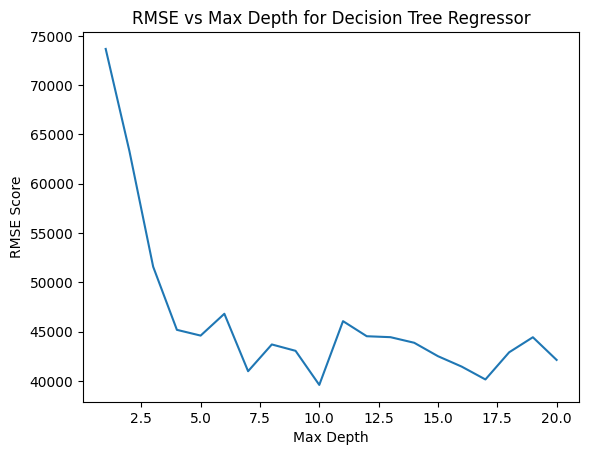

In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(x_train_log, y_train_log)
    y_pred_dt = dt_model.predict(x_test_log)
    y_pred_dt_exp = np.expm1(y_pred_dt)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_dt_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores, )
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Decision Tree Regressor')
plt.show()

Max_depth dengan RMSE terendah ialah 7, 10, dan 17

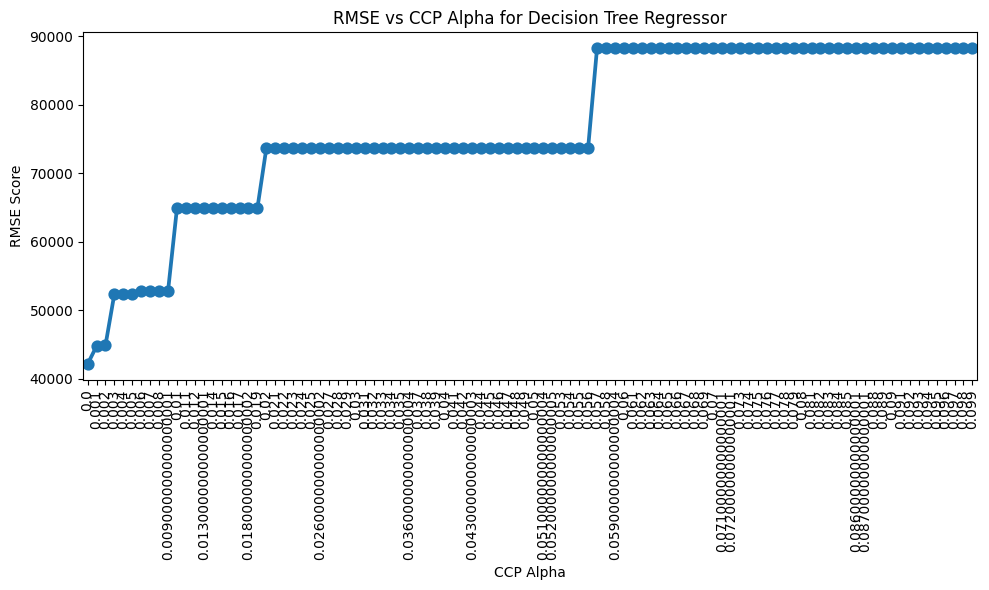

In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of ccp_alpha
ccp_alpha_range = np.arange(0, 0.1, 0.001)  # Try values from 0 to 0.05

for alpha in ccp_alpha_range:
    dt_model = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    dt_model.fit(x_train_log, y_train_log)
    y_pred_dt = dt_model.predict(x_test_log)
    y_pred_dt_exp = np.expm1(y_pred_dt)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_dt_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'ccp_alpha': ccp_alpha_range, 'RMSE': rmse_scores})

# Plot RMSE scores against ccp_alpha using pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x='ccp_alpha', y='RMSE', data=df_rmse)
plt.xlabel('CCP Alpha')
plt.ylabel('RMSE Score')
plt.title('RMSE vs CCP Alpha for Decision Tree Regressor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ccp_alpha dengan RMSE terendah ialah 0.0, 0.001, dan 0.002

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [7, 10, 17],
    'ccp_alpha': [0, 0.001, 0.002]
}

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_log, y_train_log)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................ccp_alpha=0, max_depth=7; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=7; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=7; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=7; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=7; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=10; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=10; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=10; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=10; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=10; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=17; total time=   0.0s
[CV] END ..........................ccp_alpha=0, m

In [129]:
# Buat model Decision Tree dengan hyperparameter terbaik
best_dt_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                     ccp_alpha=best_params['ccp_alpha'],
                                     random_state=42)

# Latih model
best_dt_model.fit(x_train_log, y_train_log)

# Prediksi pada data latih dan uji
y_pred_train_best_dt = best_dt_model.predict(x_train_log)
y_pred_test_best_dt = best_dt_model.predict(x_test_log)

# Inversi transformasi logaritma
y_pred_train_best_dt_exp = np.expm1(y_pred_train_best_dt)
y_pred_test_best_dt_exp = np.expm1(y_pred_test_best_dt)

# Evaluasi model pada data latih dan uji
results['Decision Tree Regressor Log Data with Tuning'] = {
    'R-squared Train': r2_score(np.expm1(y_train_log), y_pred_train_best_dt_exp),
    'R-squared Test': r2_score(np.expm1(y_test_log), y_pred_test_best_dt_exp),
    'MAE Train': mean_absolute_error(np.expm1(y_train_log), y_pred_train_best_dt_exp),
    'MAE Test': mean_absolute_error(np.expm1(y_test_log), y_pred_test_best_dt_exp),
    'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train_log), y_pred_train_best_dt_exp)),
    'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_test_best_dt_exp))
}

# Print results
print("Decision Tree Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['Decision Tree Regressor Log Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Decision Tree Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9029742052122792
R-squared Test: 0.7809232456143894
MAE Train: 15261.658777387302
MAE Test: 24642.224075138434
RMSE Train: 24056.501016328923
RMSE Test: 40992.56238086913



## Finetuning Random Forest Regressor

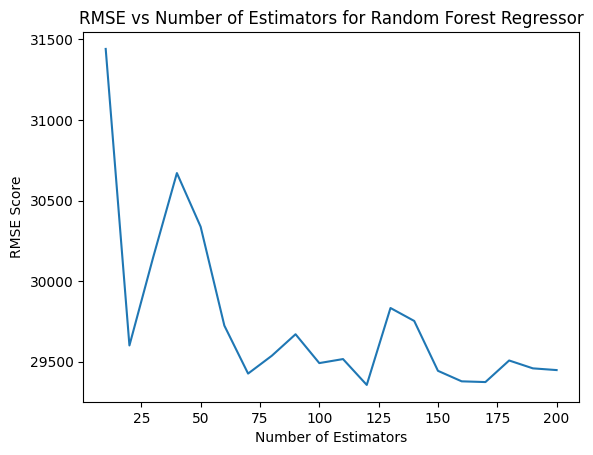

In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(10, 201, 10)  # Try values from 10 to 200

for n_estimators in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train_log, y_train_log)
    y_pred_rf = rf_model.predict(x_test_log)
    y_pred_rf_exp = np.expm1(y_pred_rf)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against n_estimators
plt.plot(n_estimators_range, rmse_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for Random Forest Regressor')
plt.show()

In [ ]:
# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 n_estimators dengan RMSE score terendah
print(df_rmse_sorted.head(5))

    n_estimators          RMSE
11           120  29355.098981
16           170  29372.833532
15           160  29377.367947
6             70  29425.451218
14           150  29442.676321


Menggunakan n_estimator 120, 160, dan 170

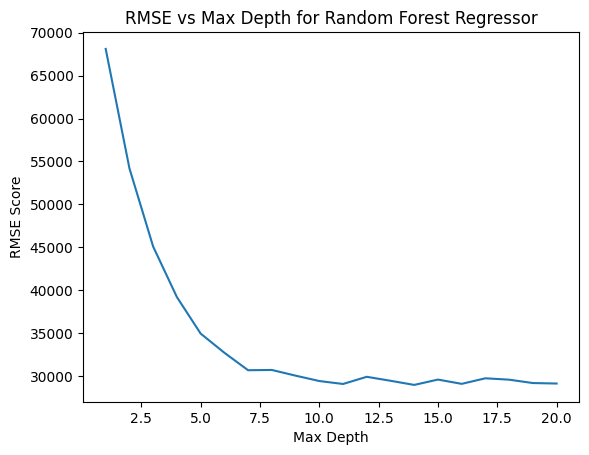

    max_depth          RMSE
13         14  29011.125664
10         11  29120.057811
15         16  29136.018153
19         20  29172.926669
18         19  29228.864626


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(x_train_log, y_train_log)
    y_pred_rf = rf_model.predict(x_test_log)
    y_pred_rf_exp = np.expm1(y_pred_rf)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Random Forest Regressor')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 max_depth dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Menggunakan max_depth 11, 14, dan 16.

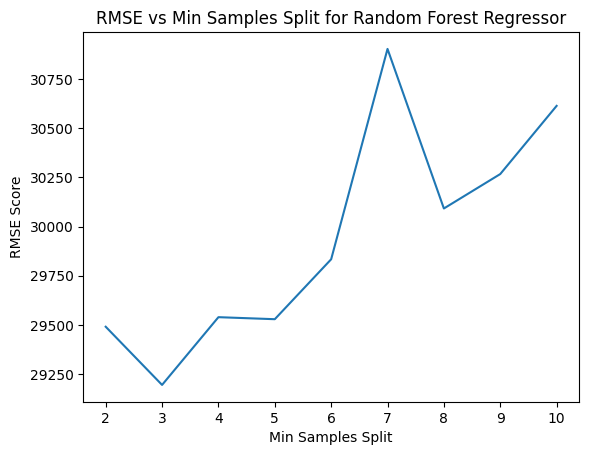

   min_samples_split          RMSE
1                  3  29194.856996
0                  2  29490.642568
3                  5  29528.884810
2                  4  29539.186543
4                  6  29833.445428


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_split
min_samples_split_range = range(2, 11)  # Try values from 2 to 10

for min_samples in min_samples_split_range:
    rf_model = RandomForestRegressor(min_samples_split=min_samples, random_state=42)
    rf_model.fit(x_train_log, y_train_log)
    y_pred_rf = rf_model.predict(x_test_log)
    y_pred_rf_exp = np.expm1(y_pred_rf)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_split
plt.plot(min_samples_split_range, rmse_scores)
plt.xlabel('Min Samples Split')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Split for Random Forest Regressor')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'min_samples_split': min_samples_split_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 min_samples_split dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan min_samples_split dengan RMSE terendah, yaitu 2, 3, dan 5.

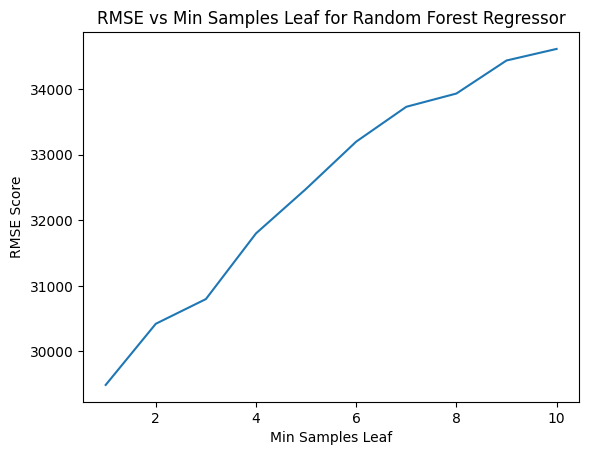

   min_samples_leaf          RMSE
0                 1  29490.642568
1                 2  30421.976574
2                 3  30798.257416
3                 4  31798.574537
4                 5  32477.251025


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_leaf
min_samples_leaf_range = range(1, 11)  # Try values from 1 to 10

for min_samples in min_samples_leaf_range:
    rf_model = RandomForestRegressor(min_samples_leaf=min_samples, random_state=42)
    rf_model.fit(x_train_log, y_train_log)
    y_pred_rf = rf_model.predict(x_test_log)
    y_pred_rf_exp = np.expm1(y_pred_rf)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_rf_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_leaf
plt.plot(min_samples_leaf_range, rmse_scores)
plt.xlabel('Min Samples Leaf')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Leaf for Random Forest Regressor')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'min_samples_leaf': min_samples_leaf_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 min_samples_leaf dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Menggunakan min_samples_leaf dengan RMSE terendah, yaitu 1, 2, dan 3.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [120, 160, 170],
    'max_depth': [11, 14, 16],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_log, y_train_log)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    def _fit_and_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    # We need this because some estimators validate X and y
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 96, 

Best Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best RMSE: 0.1420509884997661


In [130]:
# Buat model Random Forest dengan hyperparameter terbaik
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                     max_depth=best_params['max_depth'],
                                     min_samples_split=best_params['min_samples_split'],
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     max_features=best_params['max_features'],
                                     random_state=42)

# Latih model
best_rf_model.fit(x_train_log, y_train_log)

# Prediksi pada data latih dan uji
y_pred_train_best_rf = best_rf_model.predict(x_train_log)
y_pred_test_best_rf = best_rf_model.predict(x_test_log)

# Inversi transformasi logaritma
y_pred_train_best_rf_exp = np.expm1(y_pred_train_best_rf)
y_pred_test_best_rf_exp = np.expm1(y_pred_test_best_rf)

# Evaluasi model pada data latih dan uji
results['Random Forest Regressor Log Data with Tuning'] = {
    'R-squared Train': r2_score(np.expm1(y_train_log), y_pred_train_best_rf_exp),
    'R-squared Test': r2_score(np.expm1(y_test_log), y_pred_test_best_rf_exp),
    'MAE Train': mean_absolute_error(np.expm1(y_train_log), y_pred_train_best_rf_exp),
    'MAE Test': mean_absolute_error(np.expm1(y_test_log), y_pred_test_best_rf_exp),
    'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train_log), y_pred_train_best_rf_exp)),
    'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_test_best_rf_exp))
}

# Print results
print("Random Forest Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['Random Forest Regressor Log Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Random Forest Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9735148287495897
R-squared Test: 0.8510384933401917
MAE Train: 6936.800508155816
MAE Test: 17948.80648026456
RMSE Train: 12568.696759804534
RMSE Test: 33802.12047186993



## Finetuning Support Vector Machine

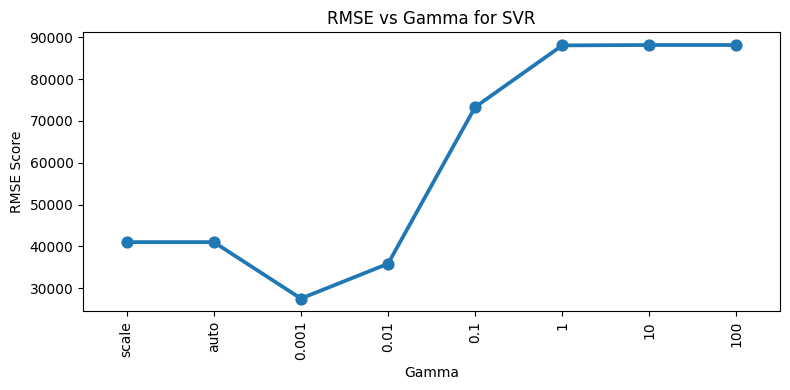

Gamma dengan RMSE terendah: 0.001


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma
gamma_range = ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_range:
    svr_model = SVR(gamma=gamma)
    svr_model.fit(x_train_scaled, y_train_log)
    y_pred_svr = svr_model.predict(x_test_scaled)
    y_pred_svr_exp = np.expm1(y_pred_svr)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_svr_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_range, 'RMSE': rmse_scores})

# Plot RMSE scores against gamma using pointplot
plt.figure(figsize=(8, 4))
sns.pointplot(x='gamma', y='RMSE', data=df_rmse)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for SVR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the gamma value with the lowest RMSE score
best_gamma = df_rmse.loc[df_rmse['RMSE'].idxmin(), 'gamma']
print("Gamma dengan RMSE terendah:", best_gamma)

Menggunakan gamma dengan RMSE score terendah, yaitu 0.001, 0.01, dan scale

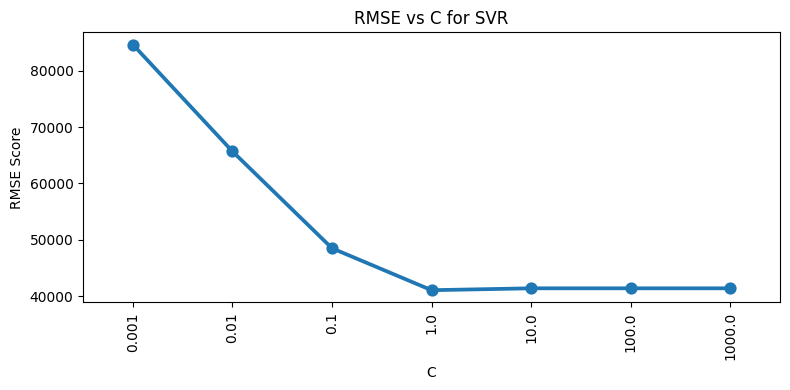

C dengan RMSE terendah: 1.0


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of C
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_list:
    svr_model = SVR(C=C)
    svr_model.fit(x_train_scaled, y_train_log)
    y_pred_svr = svr_model.predict(x_test_scaled)
    y_pred_svr_exp = np.expm1(y_pred_svr)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_svr_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'C': C_list, 'RMSE': rmse_scores})

# Plot RMSE scores against C using pointplot
plt.figure(figsize=(8, 4))
sns.pointplot(x='C', y='RMSE', data=df_rmse)
plt.xlabel('C')
plt.ylabel('RMSE Score')
plt.title('RMSE vs C for SVR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the C value with the lowest RMSE score
best_C = df_rmse.loc[df_rmse['RMSE'].idxmin(), 'C']
print("C dengan RMSE terendah:", best_C)

Gunakan C dengan RMSE terendah, yaitu 1, 10, dan 100.

In [ ]:
# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.001, 0.01],
    'C': [1, 10, 100]
}

# Create SVR model
svr_model = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_scaled, y_train_log)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   1.2s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.2s
[CV] END ....................C=1, gamma=0.001, k

In [131]:
# Buat model SVR dengan hyperparameter terbaik
best_svr_model = SVR(kernel='best_params['kernel']',
                      gamma=best_params['gamma'],
                      C=best_params['C'])

# Latih model dengan data train
best_svr_model.fit(x_train_scaled, y_train_log)

# Prediksi pada data train
y_pred_train_svr = best_svr_model.predict(x_train_scaled)
y_pred_train_svr_exp = np.expm1(y_pred_train_svr)

# Prediksi pada data test
y_pred_test_svr = best_svr_model.predict(x_test_scaled)
y_pred_test_svr_exp = np.expm1(y_pred_test_svr)

# Evaluasi model untuk data train
r2_train = r2_score(np.expm1(y_train_log), y_pred_train_svr_exp)
mae_train = mean_absolute_error(np.expm1(y_train_log), y_pred_train_svr_exp)
rmse_train = np.sqrt(mean_squared_error(np.expm1(y_train_log), y_pred_train_svr_exp))

# Evaluasi model untuk data test
r2_test = r2_score(np.expm1(y_test_log), y_pred_test_svr_exp)
mae_test = mean_absolute_error(np.expm1(y_test_log), y_pred_test_svr_exp)
rmse_test = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_test_svr_exp))

# Simpan hasil evaluasi model SVR ke dalam dictionary 'results'
results['Support Vector Regressor Log Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("Support Vector Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['Support Vector Regressor Log Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Support Vector Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9459741180514876
R-squared Test: 0.9147802618074786
MAE Train: 12399.160299357492
MAE Test: 15861.569754570079
RMSE Train: 17951.047175399985
RMSE Test: 25566.83772443754



## Finetuning XGBoost

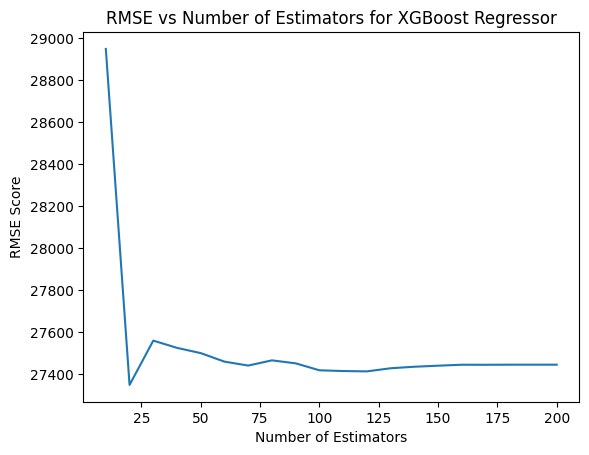

    n_estimators          RMSE
1             20  27349.927081
11           120  27414.383819
10           110  27416.043418
9            100  27419.539726
12           130  27429.244868


In [ ]:
# prompt: cari n_estimators dengan rmse terkecil

# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(10, 201, 10)  # Try values from 10 to 200

for n_estimators in n_estimators_range:
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against n_estimators
plt.plot(n_estimators_range, rmse_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for XGBoost Regressor')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 n_estimators dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan n_estimators dengan RMSE terkecil, yaitu 20, 120, dan 110.

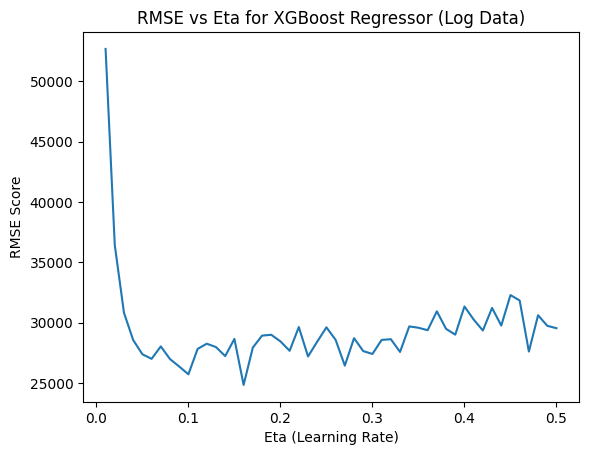

     eta          RMSE
15  0.16  24856.238152
9   0.10  25735.835607
8   0.09  26380.620906
26  0.27  26455.083312
7   0.08  26995.599569


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of eta (learning rate)
eta_range = np.arange(0.01, 0.51, 0.01)

for eta in eta_range:
    xgb_model = XGBRegressor(eta=eta, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'eta': eta_range, 'RMSE': rmse_scores})

# Plot RMSE scores against eta
plt.plot(eta_range, rmse_scores)
plt.xlabel('Eta (Learning Rate)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Eta for XGBoost Regressor (Log Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 eta values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan eta dengan RMSE terendah, yaitu 0.09, 0.1, dan 0.16.

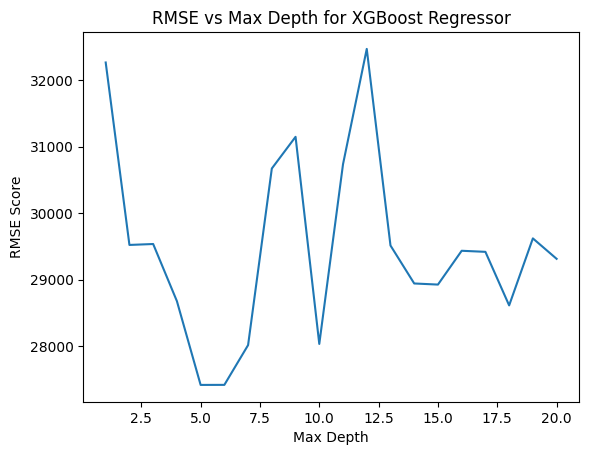

    max_depth          RMSE
4           5  27418.789823
5           6  27419.539726
6           7  28017.472399
9          10  28035.034531
17         18  28614.414081


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    xgb_model = XGBRegressor(max_depth=depth, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for XGBoost Regressor')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 max_depth dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terendah, yaitu 5, 6, dan 7.

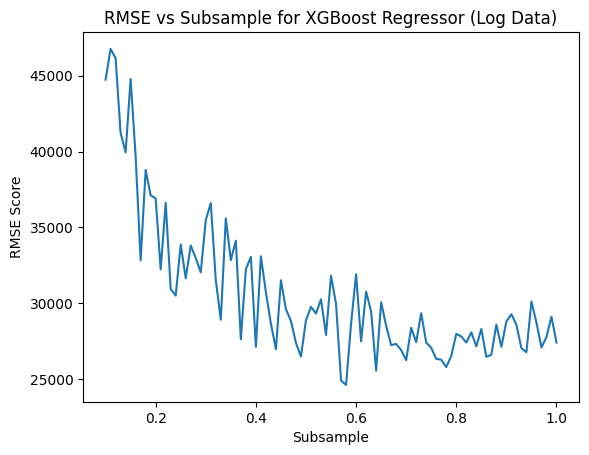

    subsample          RMSE
48       0.58  24629.154559
47       0.57  24919.692461
54       0.64  25571.753759
68       0.78  25802.886613
60       0.70  26262.932070


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of subsample
subsample_range = np.arange(0.1, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for subsample in subsample_range:
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'subsample': subsample_range, 'RMSE': rmse_scores})

# Plot RMSE scores against subsample
plt.plot(subsample_range, rmse_scores)
plt.xlabel('Subsample')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Subsample for XGBoost Regressor (Log Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 subsample values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan subsample dengan RMSE terendah, yaitu 0.57, 0.58, dan 0.64.

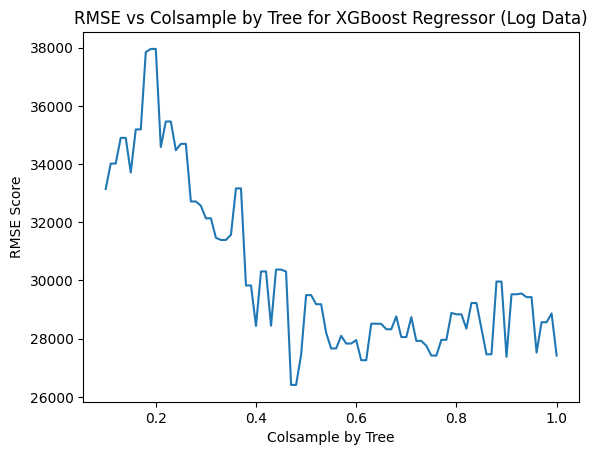

    colsample_bytree          RMSE
38              0.48  26410.484576
37              0.47  26410.484576
52              0.62  27259.881467
51              0.61  27259.881467
80              0.90  27376.519798


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of colsample_bytree
colsample_bytree_range = np.arange(0.1, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for colsample_bytree in colsample_bytree_range:
    xgb_model = XGBRegressor(colsample_bytree=colsample_bytree, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'colsample_bytree': colsample_bytree_range, 'RMSE': rmse_scores})

# Plot RMSE scores against colsample_bytree
plt.plot(colsample_bytree_range, rmse_scores)
plt.xlabel('Colsample by Tree')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Colsample by Tree for XGBoost Regressor (Log Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 colsample_bytree values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan colsample_bytree dengan RMSE terendah, yaitu 0.47, 0.48, dan 0.62.

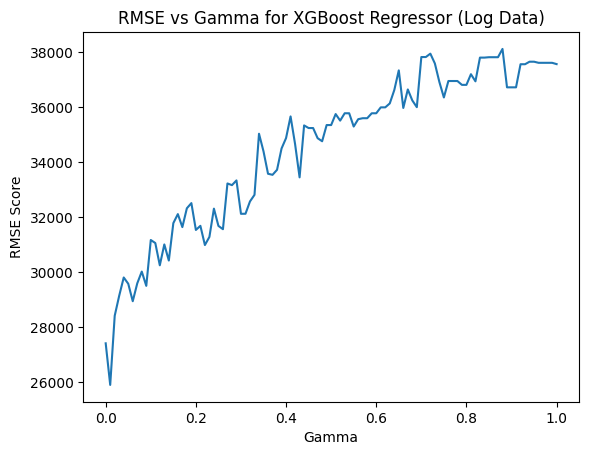

   gamma          RMSE
1   0.01  25909.155259
0   0.00  27419.539726
2   0.02  28421.472491
6   0.06  28947.874041
3   0.03  29150.799666


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma (regularization parameter)
gamma_range = np.arange(0, 1.01, 0.01)

for gamma in gamma_range:
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_range, 'RMSE': rmse_scores})

# Plot RMSE scores against colsample_bytree
plt.plot(gamma_range, rmse_scores)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for XGBoost Regressor (Log Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 gamma values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan gamma dengan RMSE terendah, yaitu 0, 0.01, dan 0.02.

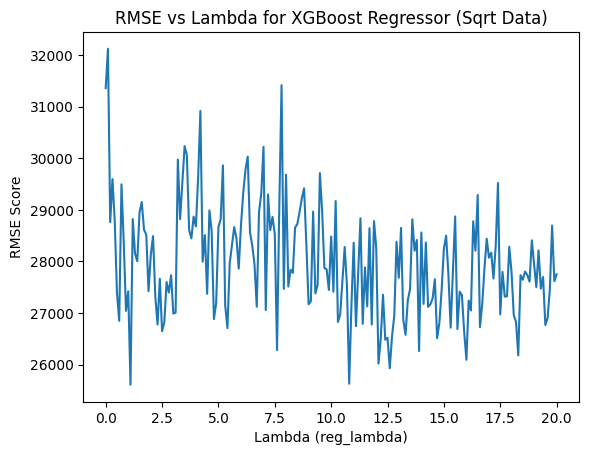

     lambda          RMSE
11      1.1  25608.717984
108    10.8  25628.842615
126    12.6  25929.930197
121    12.1  26020.367930
160    16.0  26092.854010


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of lambda (L2 regularization parameter)
lambda_range = np.arange(0, 20.1, 0.1)

for lambda_val in lambda_range:
    xgb_model = XGBRegressor(reg_lambda=lambda_val, random_state=42)
    xgb_model.fit(x_train_log, y_train_log)
    y_pred_xgb = xgb_model.predict(x_test_log)
    y_pred_xgb_exp = np.expm1(y_pred_xgb)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_xgb_exp))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'lambda': lambda_range, 'RMSE': rmse_scores})

# Plot RMSE scores against lambda
plt.plot(lambda_range, rmse_scores)
plt.xlabel('Lambda (reg_lambda)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Lambda for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 lambda values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan lambda dengan RMSE terendah, yaitu 1.1, 10.8, dan 12.6.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [20, 120, 110],
    'eta': [0.09, 0.1, 0.16],
    'max_depth': [5, 6, 7],
    'subsample': [0.57, 0.58, 0.64],
    'colsample_bytree': [0.47, 0.48, 0.62],
    'gamma': [0, 0.01, 0.02],
    'reg_lambda': [1.1, 10.8, 12.6],
}

# Create XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_log, y_train_log)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Streaming output truncated to the last 5000 lines.
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=20, reg_lambda=12.6, subsample=0.64; total time=   0.1s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=20, reg_lambda=12.6, subsample=0.64; total time=   0.1s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=20, reg_lambda=12.6, subsample=0.64; total time=   0.1s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=120, reg_lambda=1.1, subsample=0.57; total time=   0.3s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=120, reg_lambda=1.1, subsample=0.57; total time=   0.3s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=120, reg_lambda=1.1, subsample=0.57; total time=   0.3s
[CV] END colsample_bytree=0.47, eta=0.16, gamma=0, max_depth=6, n_estimators=120, reg_lambda=1.1, subsample=0.58; total time=   0.3s
[CV] END colsample

In [132]:
# Buat model XGBoost dengan hyperparameter terbaik
best_xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    eta=best_params['eta'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_lambda=best_params['reg_lambda'],
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)

# Latih model pada data pelatihan
best_xgb_model.fit(x_train_log, y_train_log)

# Prediksi pada data pelatihan dan pengujian
y_pred_train_xgb = best_xgb_model.predict(x_train_log)
y_pred_test_xgb = best_xgb_model.predict(x_test_log)

# Kembalikan ke skala asli (karena data dilogaritma sebelumnya)
y_pred_train_xgb_exp = np.expm1(y_pred_train_xgb)
y_pred_test_xgb_exp = np.expm1(y_pred_test_xgb)

# Evaluasi model pada data pelatihan dan pengujian
results['XGBoost Regressor Log Data with Tuning'] = {
    'R-squared Train': r2_score(np.expm1(y_train_log), y_pred_train_xgb_exp),
    'R-squared Test': r2_score(np.expm1(y_test_log), y_pred_test_xgb_exp),
    'MAE Train': mean_absolute_error(np.expm1(y_train_log), y_pred_train_xgb_exp),
    'MAE Test': mean_absolute_error(np.expm1(y_test_log), y_pred_test_xgb_exp),
    'RMSE Train': np.sqrt(mean_squared_error(np.expm1(y_train_log), y_pred_train_xgb_exp)),
    'RMSE Test': np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_test_xgb_exp))
}

# Print results
print("XGBoost Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['XGBoost Regressor Log Data with Tuning'].items():
    print(metric_name + ":", value)
print()

XGBoost Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9483576617903213
R-squared Test: 0.8799078609565303
MAE Train: 10103.391614940068
MAE Test: 16224.423480308229
RMSE Train: 17550.593379734353
RMSE Test: 30350.38519330993



# Modelling with Finetuning using Grid Search CV for Sqrt Data

## Finetuning Decision Tree

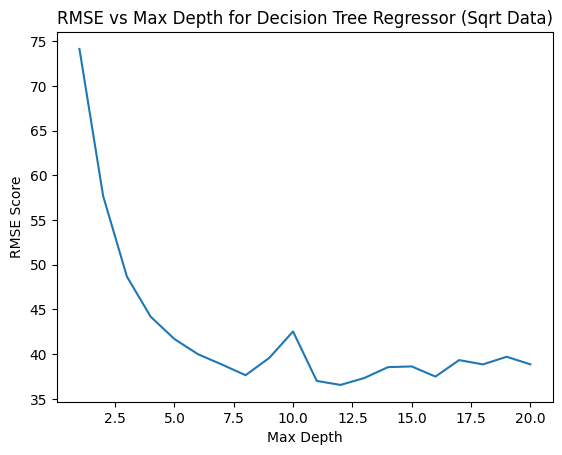

    max_depth       RMSE
11         12  36.558060
10         11  37.004645
12         13  37.327842
15         16  37.490852
7           8  37.643327


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_dt = dt_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_dt))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Decision Tree Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 max_depth dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Menggunakan max_depth dengan RMSE terendah, yaitu 11, 12, dan 13.

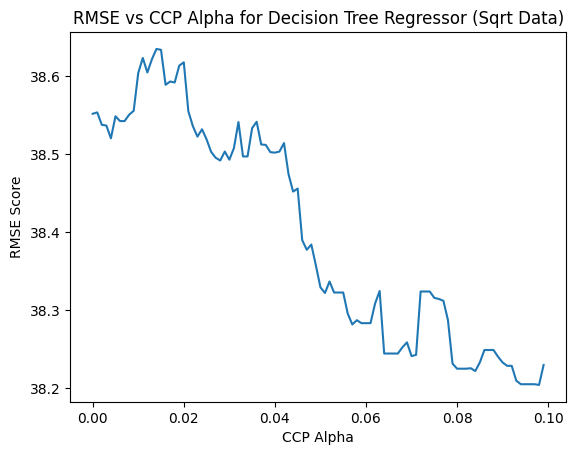

    ccp_alpha       RMSE
98      0.098  38.204524
97      0.097  38.205421
96      0.096  38.205421
95      0.095  38.205421
94      0.094  38.205421


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of ccp_alpha
ccp_alpha_range = np.arange(0, 0.1, 0.001)  # Try values from 0 to 0.1 with step 0.001

for ccp_alpha in ccp_alpha_range:
    dt_model = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    dt_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_dt = dt_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_dt))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'ccp_alpha': ccp_alpha_range, 'RMSE': rmse_scores})

# Plot RMSE scores against ccp_alpha
plt.plot(ccp_alpha_range, rmse_scores)
plt.xlabel('CCP Alpha')
plt.ylabel('RMSE Score')
plt.title('RMSE vs CCP Alpha for Decision Tree Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 ccp_alpha values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan ccp_alpha dengan RMSE terkecil, yaitu 0.096, 0.097, dan 0.098.

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [11, 12, 13],
    'ccp_alpha': [0.096, 0.097, 0.098]
}

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_sqrt, y_train_sqrt)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......................ccp_alpha=0.096, max_depth=11; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=11; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=11; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=12; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=12; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=12; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=13; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=13; total time=   0.0s
[CV] END ......................ccp_alpha=0.096, max_depth=13; total time=   0.0s
[CV] END ......................ccp_alpha=0.097, max_depth=11; total time=   0.0s
[CV] END ......................ccp_alpha=0.097, max_depth=11; total time=   0.0s
[CV] END ......................ccp_alpha=0.097, m

In [133]:
# Buat model Decision Tree dengan hyperparameter terbaik
best_dt_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                     ccp_alpha=best_params['ccp_alpha'],
                                     random_state=42)

# Latih model pada data pelatihan
best_dt_model.fit(x_train_sqrt, y_train_sqrt)

# Prediksi pada data pelatihan dan pengujian
y_pred_train_dt = best_dt_model.predict(x_train_sqrt)
y_pred_test_dt = best_dt_model.predict(x_test_sqrt)

# Kembalikan ke skala asli (karena data diakarkan sebelumnya)
y_pred_train_dt_exp = np.square(y_pred_train_dt)
y_pred_test_dt_exp = np.square(y_pred_test_dt)
y_train_exp = np.square(y_train_sqrt)
y_test_exp = np.square(y_test_sqrt)

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_exp, y_pred_train_dt_exp)
mae_train = mean_absolute_error(y_train_exp, y_pred_train_dt_exp)
rmse_train = np.sqrt(mean_squared_error(y_train_exp, y_pred_train_dt_exp))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_exp, y_pred_test_dt_exp)
mae_test = mean_absolute_error(y_test_exp, y_pred_test_dt_exp)
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_pred_test_dt_exp))

# Simpan hasil evaluasi model Decision Tree ke dalam dictionary 'results'
results['Decision Tree Regressor Sqrt Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("Decision Tree Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['Decision Tree Regressor Sqrt Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Decision Tree Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9968534286180396
R-squared Test: 0.8235899932502755
MAE Train: 2786.620459806588
MAE Test: 23208.39451000379
RMSE Train: 4332.191539076567
RMSE Test: 36784.81069656971



## Finetuning Random Forest

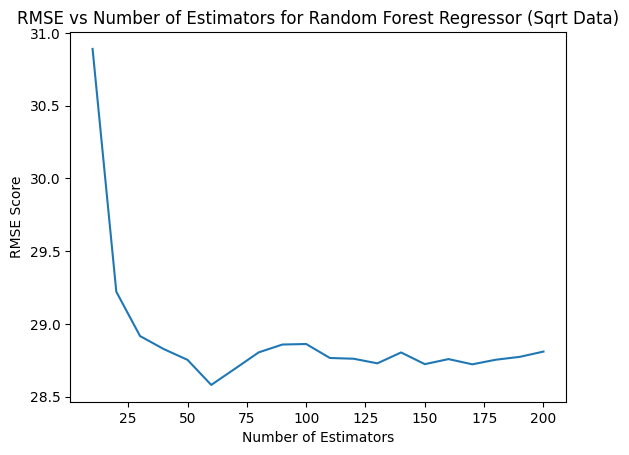

    n_estimators       RMSE
5             60  28.580000
6             70  28.691255
16           170  28.721673
14           150  28.722855
12           130  28.728392


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(10, 201, 10)  # Try values from 10 to 200

for n_estimators in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_rf = rf_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against n_estimators
plt.plot(n_estimators_range, rmse_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for Random Forest Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 n_estimators dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan n_estimators dengan RMSE terkecil, yaitu 60, 70, dan 170.

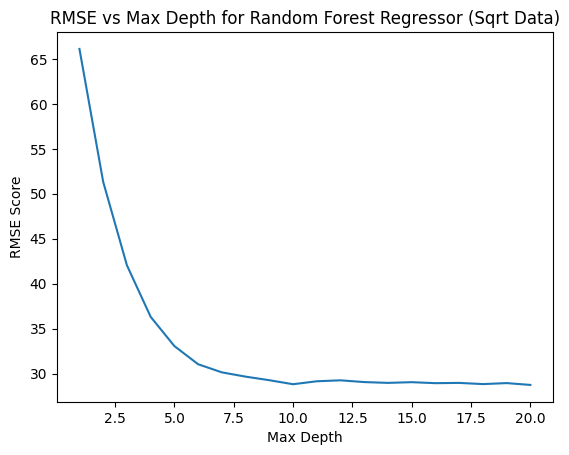

    max_depth       RMSE
19         20  28.741189
9          10  28.818437
17         18  28.833129
15         16  28.935577
18         19  28.944349


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_rf = rf_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Random Forest Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 max_depth dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terkecil, yaitu 10, 18, dan 20.

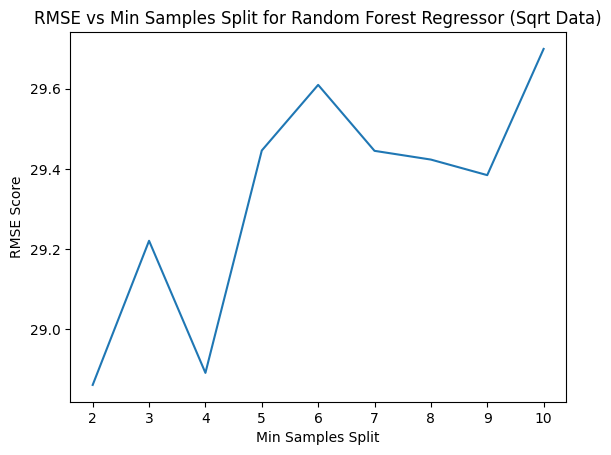

   min_samples_split       RMSE
0                  2  28.861338
2                  4  28.891395
1                  3  29.220862
7                  9  29.384537
6                  8  29.423372


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_split
min_samples_split_range = range(2, 11)  # Try values from 2 to 10

for min_samples_split in min_samples_split_range:
    rf_model = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    rf_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_rf = rf_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_split
plt.plot(min_samples_split_range, rmse_scores)
plt.xlabel('Min Samples Split')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Split for Random Forest Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'min_samples_split': min_samples_split_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 min_samples_split dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan min_samples_split dengan RMSE terkecil, yaitu 2, 3, dan 4.

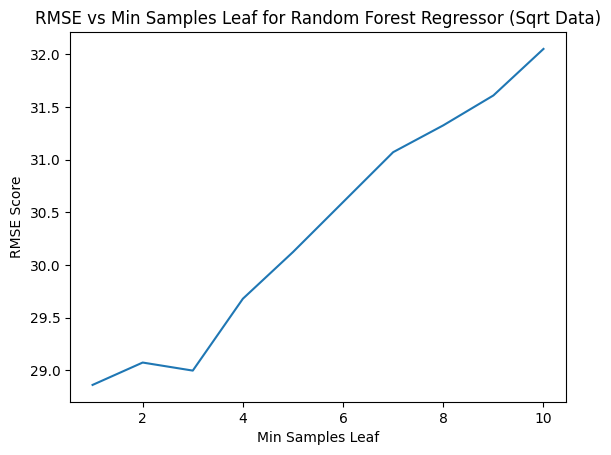

   min_samples_leaf       RMSE
0                 1  28.861338
2                 3  28.997351
1                 2  29.073890
3                 4  29.680005
4                 5  30.123345


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_leaf
min_samples_leaf_range = range(1, 11)  # Try values from 1 to 10

for min_samples_leaf in min_samples_leaf_range:
    rf_model = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_rf = rf_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_leaf
plt.plot(min_samples_leaf_range, rmse_scores)
plt.xlabel('Min Samples Leaf')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Leaf for Random Forest Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'min_samples_leaf': min_samples_leaf_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 min_samples_leaf dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan min_samples_leaf dengan RMSE terkecil, yaitu 1, 2, dan 3.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [60, 70, 170],
    'max_depth': [10, 18, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_sqrt, y_train_sqrt)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; to

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 170}
Best RMSE: 30.857686577764937


In [134]:
# Buat model Random Forest dengan hyperparameter terbaik
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Latih model pada data pelatihan
best_rf_model.fit(x_train_sqrt, y_train_sqrt)

# Prediksi pada data pelatihan dan pengujian
y_pred_train_rf = best_rf_model.predict(x_train_sqrt)
y_pred_test_rf = best_rf_model.predict(x_test_sqrt)

# Kembalikan ke skala asli (karena data diakarkan sebelumnya)
y_pred_train_rf_exp = np.square(y_pred_train_rf)
y_pred_test_rf_exp = np.square(y_pred_test_rf)
y_train_exp = np.square(y_train_sqrt)
y_test_exp = np.square(y_test_sqrt)

# Evaluasi model pada data pelatihan dan pengujian
results['Random Forest Regressor Sqrt Data with Tuning'] = {
    'R-squared Train': r2_score(y_train_exp, y_pred_train_rf_exp),
    'R-squared Test': r2_score(y_test_exp, y_pred_test_rf_exp),
    'MAE Train': mean_absolute_error(y_train_exp, y_pred_train_rf_exp),
    'MAE Test': mean_absolute_error(y_test_exp, y_pred_test_rf_exp),
    'RMSE Train': np.sqrt(mean_squared_error(y_train_exp, y_pred_train_rf_exp)),
    'RMSE Test': np.sqrt(mean_squared_error(y_test_exp, y_pred_test_rf_exp))
}

# Print results
print("Random Forest Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['Random Forest Regressor Sqrt Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Random Forest Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9778634486725308
R-squared Test: 0.8654038056296163
MAE Train: 6501.801908642533
MAE Test: 17636.321432446086
RMSE Train: 11490.62990558243
RMSE Test: 32130.930846566003



## Finetuning SVM

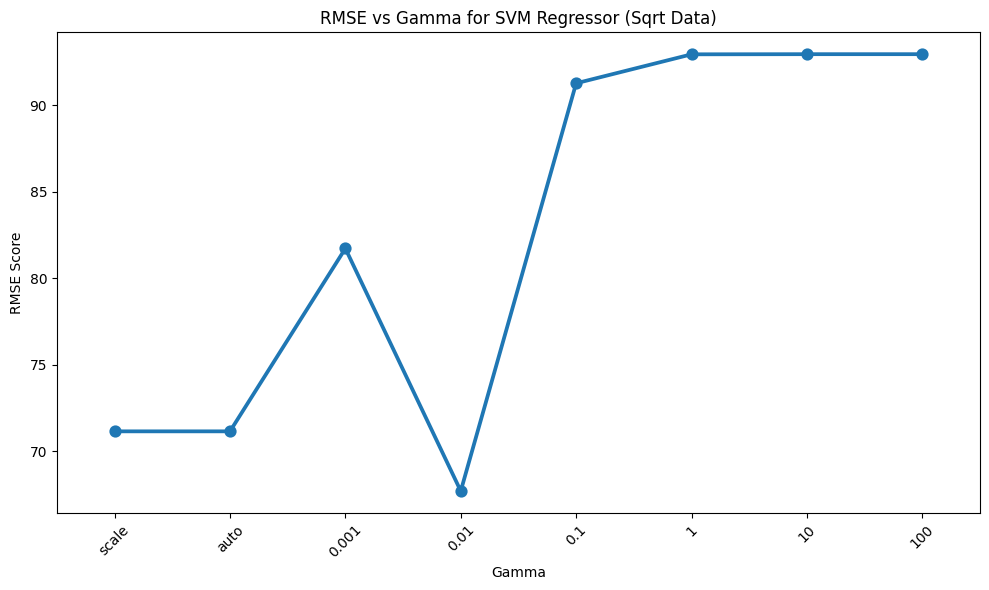

   gamma       RMSE
3   0.01  67.713636
0  scale  71.165120
1   auto  71.165120
2  0.001  81.735961
4    0.1  91.284886


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma
gamma_list = ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_list:
    svm_model = SVR(gamma=gamma)
    svm_model.fit(x_train_scaled, y_train_sqrt)
    y_pred_svm = svm_model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_svm))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_list, 'RMSE': rmse_scores})

# Plot RMSE scores against gamma
plt.figure(figsize=(10, 6))
sns.pointplot(x='gamma', y='RMSE', data=df_rmse)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for SVM Regressor (Sqrt Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 gamma values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan gamma dengan RMSE terkecil, yaitu auto, scale, dan 0.01.

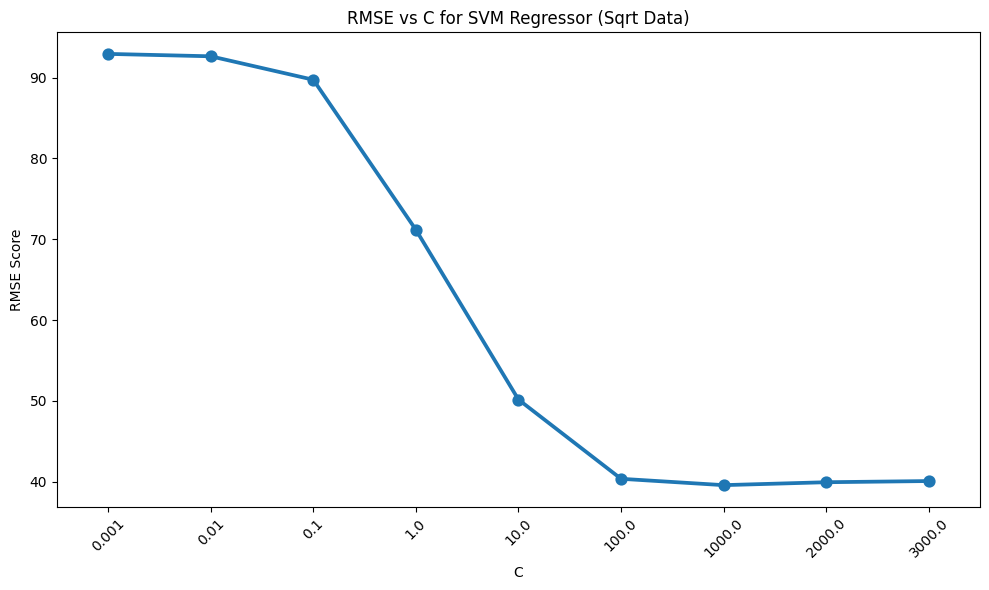

        C       RMSE
6  1000.0  39.567163
7  2000.0  39.928331
8  3000.0  40.073830
5   100.0  40.353326
4    10.0  50.156563


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of C
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3000]  # Try different values of C

for C in C_range:
    svm_model = SVR(C=C)
    svm_model.fit(x_train_scaled, y_train_sqrt)
    y_pred_svm = svm_model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_svm))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'C': C_range, 'RMSE': rmse_scores})

# Plot RMSE scores against C
plt.figure(figsize=(10, 6))
sns.pointplot(x='C', y='RMSE', data=df_rmse)
plt.xlabel('C')
plt.ylabel('RMSE Score')
plt.title('RMSE vs C for SVM Regressor (Sqrt Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 C values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan C dengan RMSE terkecil, yaitu 1000, 2000, dan 3000.

In [ ]:
# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01],
    'C': [1000, 2000, 3000]
}

# Create SVM model
svm_model = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_scaled, y_train_sqrt)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .................C=1000, gamma=scale, kernel=linear; total time= 1.1min
[CV] END .................C=1000, gamma=scale, kernel=linear; total time=  34.2s
[CV] END .................C=1000, gamma=scale, kernel=linear; total time= 1.8min
[CV] END ....................C=1000, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ....................C=1000, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ....................C=1000, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...................C=1000, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ...................C=1000, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ...................C=1000, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ..................C=1000, gamma=auto, kernel=linear; total time= 1.1min
[CV] END ..................C=1000, gamma=auto, kernel=linear; total time=  34.0s
[CV] END ..................C=1000, gamma=auto, k

In [135]:
# Buat model SVM dengan hyperparameter terbaik
best_svm_model = SVR(kernel=best_params['kernel'],
                     gamma=best_params['gamma'],
                     C=best_params['C'])

# Latih model pada data pelatihan
best_svm_model.fit(x_train_scaled, y_train_sqrt)

# Prediksi pada data pelatihan dan pengujian
y_pred_train_svm = best_svm_model.predict(x_train_scaled)
y_pred_test_svm = best_svm_model.predict(x_test_scaled)

# Kembalikan ke skala asli (karena data diakarkan sebelumnya)
y_pred_train_svm_exp = np.square(y_pred_train_svm)
y_pred_test_svm_exp = np.square(y_pred_test_svm)
y_train_exp = np.square(y_train_sqrt)
y_test_exp = np.square(y_test_sqrt)

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_exp, y_pred_train_svm_exp)
mae_train = mean_absolute_error(y_train_exp, y_pred_train_svm_exp)
rmse_train = np.sqrt(mean_squared_error(y_train_exp, y_pred_train_svm_exp))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_exp, y_pred_test_svm_exp)
mae_test = mean_absolute_error(y_test_exp, y_pred_test_svm_exp)
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_pred_test_svm_exp))

# Simpan hasil evaluasi model SVM ke dalam dictionary 'results'
results['SVM Regressor Sqrt Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("SVM Regressor dengan Hyperparameter Terbaik:")
for metric_name, value in results['SVM Regressor Sqrt Data with Tuning'].items():
    print(metric_name + ":", value)
print()

SVM Regressor dengan Hyperparameter Terbaik:
R-squared Train: 0.9942022999784798
R-squared Test: 0.8424903198998784
MAE Train: 1184.8037053622074
MAE Test: 18655.236143962346
RMSE Train: 5880.53346773523
RMSE Test: 34758.461231153815



## Finetuning XGBoost

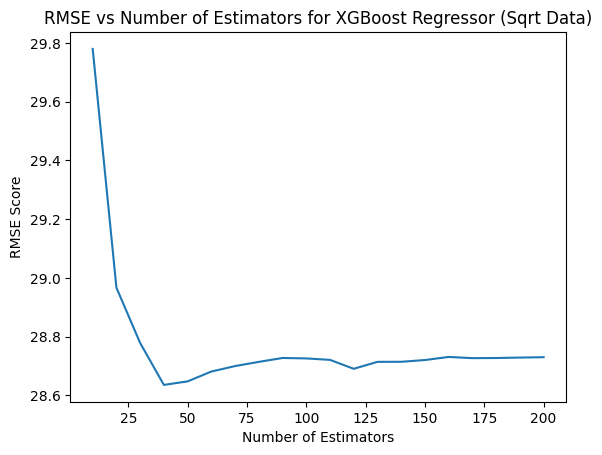

    n_estimators       RMSE
3             40  28.635680
4             50  28.647757
5             60  28.681266
11           120  28.690583
6             70  28.699837


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(10, 201, 10)  # Try values from 10 to 200

for n_estimators in n_estimators_range:
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Plot RMSE scores against n_estimators
plt.plot(n_estimators_range, rmse_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for XGBoost Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 n_estimators dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan n_estimators dengan RMSE terkecil, yaitu 40, 50, dan 60.

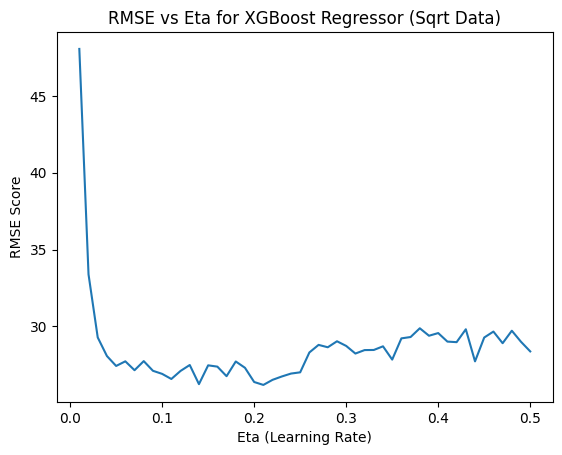

     eta       RMSE
20  0.21  26.187829
13  0.14  26.238723
19  0.20  26.377679
21  0.22  26.519135
10  0.11  26.573905


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of eta (learning rate)
eta_range = np.arange(0.01, 0.51, 0.01)  # Try values from 0.01 to 0.3 with step 0.01

for eta in eta_range:
    xgb_model = XGBRegressor(eta=eta, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'eta': eta_range, 'RMSE': rmse_scores})

# Plot RMSE scores against eta
plt.plot(eta_range, rmse_scores)
plt.xlabel('Eta (Learning Rate)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Eta for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 eta values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan eta dengan RMSE terkecil, yaitu 0.14, 0.20, dan 0.21.

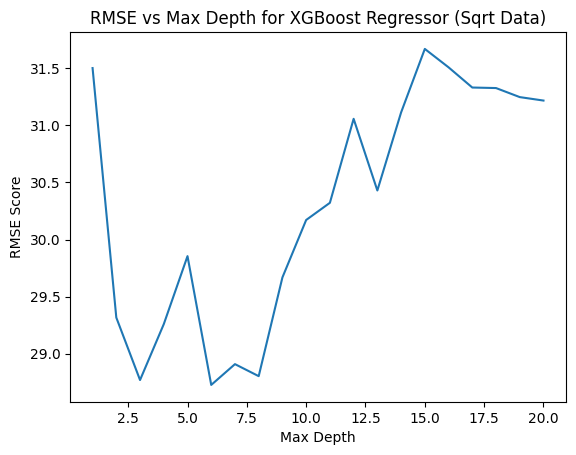

   max_depth       RMSE
5          6  28.725872
2          3  28.768731
7          8  28.802690
6          7  28.908004
3          4  29.258211


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    xgb_model = XGBRegressor(max_depth=depth, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for XGBoost Regressor (Sqrt Data)')
plt.show()

# Buat DataFrame untuk menyimpan hasil
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Urutkan DataFrame berdasarkan RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Tampilkan 5 max_depth dengan RMSE score terendah
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terkecil, yaitu 3, 6, dan 8.

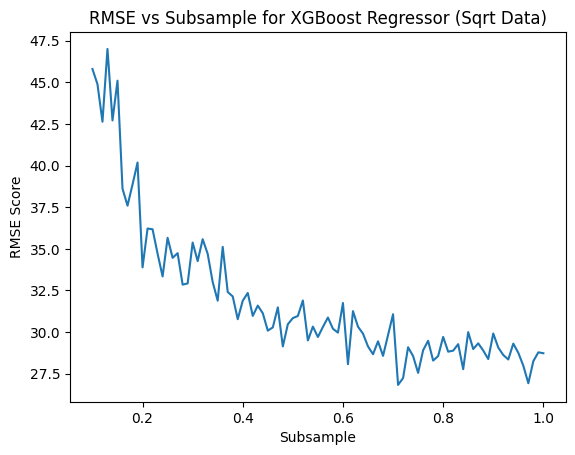

    subsample       RMSE
61       0.71  26.822680
87       0.97  26.922896
62       0.72  27.235248
65       0.75  27.544551
74       0.84  27.769052


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of subsample
subsample_range = np.arange(0.1, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for subsample in subsample_range:
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'subsample': subsample_range, 'RMSE': rmse_scores})

# Plot RMSE scores against subsample
plt.plot(subsample_range, rmse_scores)
plt.xlabel('Subsample')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Subsample for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 subsample values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan subsample dengan RMSE terkecil, yaitu 0.71, 0.72, dan 0.97.

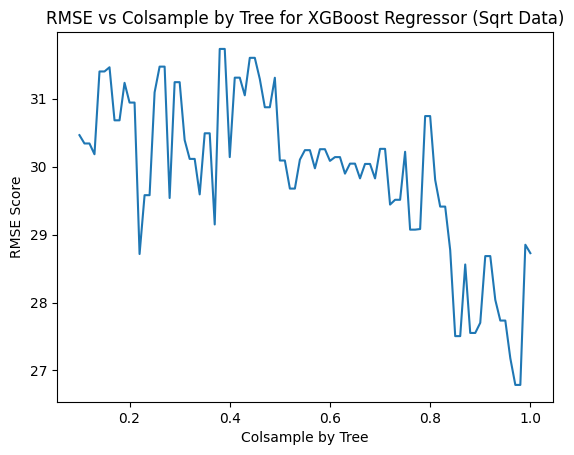

    colsample_bytree       RMSE
88              0.98  26.787731
87              0.97  26.787731
86              0.96  27.180144
75              0.85  27.505536
76              0.86  27.505536


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of colsample_bytree
colsample_bytree_range = np.arange(0.1, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for colsample_bytree in colsample_bytree_range:
    xgb_model = XGBRegressor(colsample_bytree=colsample_bytree, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'colsample_bytree': colsample_bytree_range, 'RMSE': rmse_scores})

# Plot RMSE scores against colsample_bytree
plt.plot(colsample_bytree_range, rmse_scores)
plt.xlabel('Colsample by Tree')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Colsample by Tree for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 colsample_bytree values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan colsample_bytree dengan RMSE terkecil, yaitu 0.96, 0.97, dan 0.98.

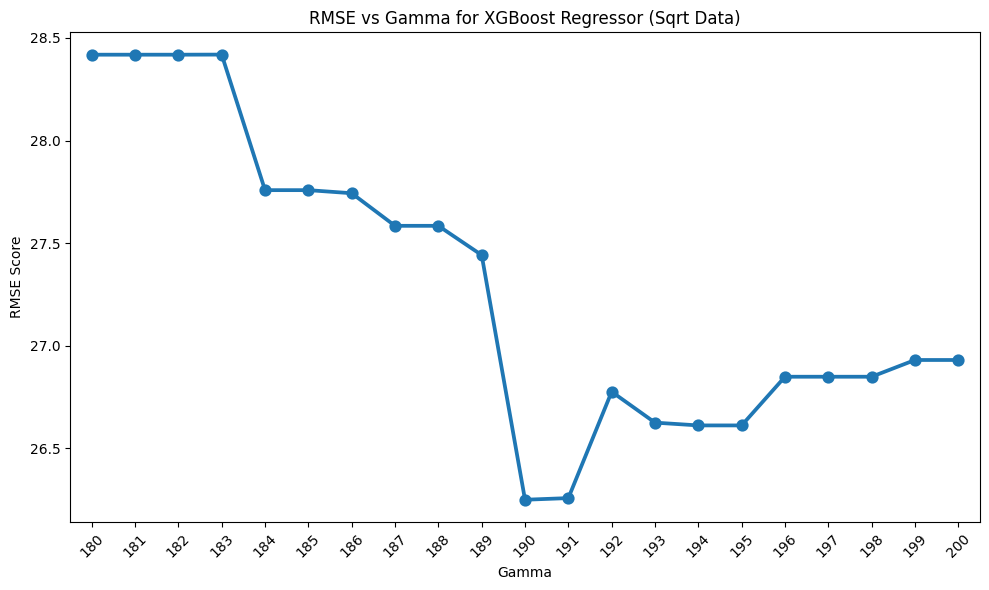

    gamma       RMSE
10    190  26.249868
11    191  26.257876
15    195  26.611962
14    194  26.611962
13    193  26.625549


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma
gamma_range = range(180, 201)  # Adjust the range as needed

for gamma in gamma_range:
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_range, 'RMSE': rmse_scores})

# Plot RMSE scores against gamma
plt.figure(figsize=(10, 6))
sns.pointplot(x='gamma', y='RMSE', data=df_rmse)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for XGBoost Regressor (Sqrt Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 gamma values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan gamma dengan RMSE terkecil, yaitu 190, 191, dan 195.

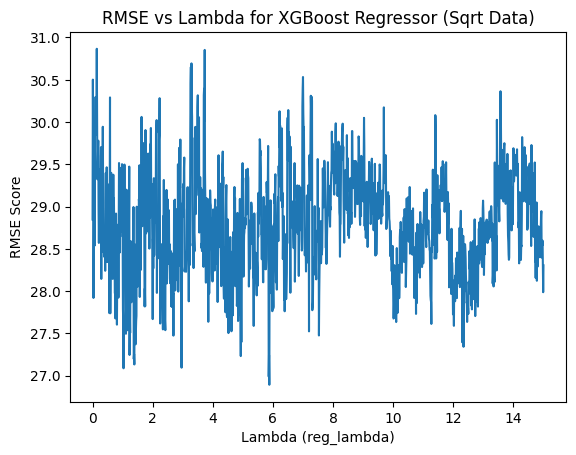

     lambda       RMSE
588    5.88  26.891135
586    5.86  26.987970
103    1.03  27.086339
296    2.96  27.093503
139    1.39  27.131571


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of lambda (reg_lambda)
lambda_range = np.arange(0, 15.01, 0.01)  # Try values from 0 to 1 with step 0.1

for lambda_val in lambda_range:
    xgb_model = XGBRegressor(reg_lambda=lambda_val, random_state=42)
    xgb_model.fit(x_train_sqrt, y_train_sqrt)
    y_pred_xgb = xgb_model.predict(x_test_sqrt)
    rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'lambda': lambda_range, 'RMSE': rmse_scores})

# Plot RMSE scores against lambda
plt.plot(lambda_range, rmse_scores)
plt.xlabel('Lambda (reg_lambda)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Lambda for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 lambda values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan lambda dengan RMSE terkecil, yaitu 1.03, 5.86, dan 5.88.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [40, 50, 60],
    'eta': [0.14, 0.20, 0.21],
    'max_depth': [3, 6, 8],
    'subsample': [0.71, 0.72, 0.97],
    'colsample_bytree': [0.96, 0.97, 0.98],
    'gamma': [190, 191, 195],
    'reg_lambda': [1.03, 5.86, 5.88]
}

# Create XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_sqrt, y_train_sqrt)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Streaming output truncated to the last 5000 lines.
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.72; total time=   0.2s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.72; total time=   0.2s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.72; total time=   0.2s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.97; total time=   0.2s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.97; total time=   0.3s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=40, reg_lambda=5.88, subsample=0.97; total time=   0.2s
[CV] END colsample_bytree=0.96, eta=0.21, gamma=190, max_depth=6, n_estimators=50, reg_lambda=1.03, subsample=0.71; total time=   0.2s
[CV]

In [136]:
# Buat model XGBoost dengan hyperparameter terbaik
best_xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    eta=best_params['eta'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_lambda=best_params['reg_lambda'],
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)

# Latih model pada data pelatihan (sqrt)
best_xgb_model.fit(x_train_sqrt, y_train_sqrt)

# Prediksi pada data pelatihan dan pengujian (sqrt)
y_pred_train_xgb = best_xgb_model.predict(x_train_sqrt)
y_pred_test_xgb = best_xgb_model.predict(x_test_sqrt)

# Kembalikan ke skala asli (karena data diakarkan sebelumnya)
y_pred_train_xgb_exp = np.square(y_pred_train_xgb)
y_pred_test_xgb_exp = np.square(y_pred_test_xgb)
y_train_exp = np.square(y_train_sqrt)  # Inverse transformasi data pelatihan
y_test_exp = np.square(y_test_sqrt)    # Inverse transformasi data pengujian

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_exp, y_pred_train_xgb_exp)
mae_train = mean_absolute_error(y_train_exp, y_pred_train_xgb_exp)
rmse_train = np.sqrt(mean_squared_error(y_train_exp, y_pred_train_xgb_exp))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_exp, y_pred_test_xgb_exp)
mae_test = mean_absolute_error(y_test_exp, y_pred_test_xgb_exp)
rmse_test = np.sqrt(mean_squared_error(y_test_exp, y_pred_test_xgb_exp))

# Simpan hasil evaluasi model XGBoost ke dalam dictionary 'results'
results['XGBoost Regressor Sqrt Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("XGBoost Regressor dengan Hyperparameter Terbaik (Data Sqrt):")
for metric_name, value in results['XGBoost Regressor Sqrt Data with Tuning'].items():
    print(metric_name + ":", value)
print()

XGBoost Regressor dengan Hyperparameter Terbaik (Data Sqrt):
R-squared Train: 0.9360006987966819
R-squared Test: 0.8943879526986444
MAE Train: 12572.919751311
MAE Test: 17264.59568974743
RMSE Train: 19537.836530621742
RMSE Test: 28461.884235065576



# Modelling with Finetuning using Grid Search CV for Boxcox Data

## Finetuning Decision Tree

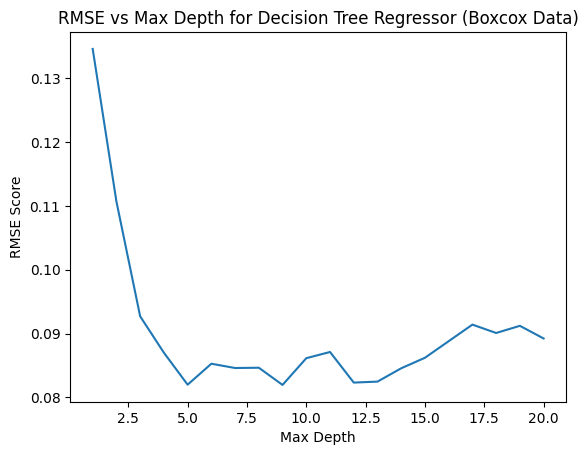

    max_depth      RMSE
8           9  0.081948
4           5  0.081987
11         12  0.082315
12         13  0.082467
13         14  0.084556


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_dt = dt_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_dt))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Decision Tree Regressor (Boxcox Data)')
plt.show()

# Create DataFrame to store results
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display 5 max_depth with lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terkecil, yaitu 9, 5, dan 12.

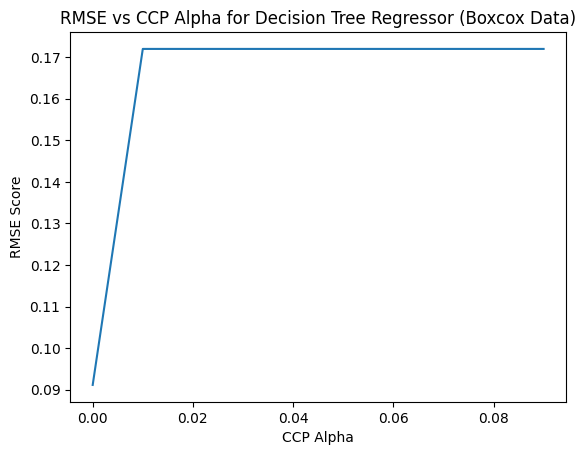

   ccp_alpha      RMSE
0       0.00  0.091170
1       0.01  0.171983
2       0.02  0.171983
3       0.03  0.171983
4       0.04  0.171983


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of ccp_alpha
ccp_alpha_range = np.arange(0, 0.1, 0.01)  # Try values from 0.0 to 0.1 with step 0.01

for ccp_alpha in ccp_alpha_range:
    dt_model = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    dt_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_dt = dt_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_dt))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'ccp_alpha': ccp_alpha_range, 'RMSE': rmse_scores})

# Plot RMSE scores against ccp_alpha
plt.plot(ccp_alpha_range, rmse_scores)
plt.xlabel('CCP Alpha')
plt.ylabel('RMSE Score')
plt.title('RMSE vs CCP Alpha for Decision Tree Regressor (Boxcox Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 ccp_alpha values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan ccp_alpha dengan RMSE terkecil, yaitu 0, 0.01, dan 0.02.

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [9, 5, 12],
    'ccp_alpha': [0, 0.01, 0.02]
}

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_boxcox, y_train_boxcox)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...........................ccp_alpha=0, max_depth=9; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=9; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=9; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=5; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=5; total time=   0.0s
[CV] END ...........................ccp_alpha=0, max_depth=5; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=12; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=12; total time=   0.0s
[CV] END ..........................ccp_alpha=0, max_depth=12; total time=   0.0s
[CV] END ........................ccp_alpha=0.01, max_depth=9; total time=   0.0s
[CV] END ........................ccp_alpha=0.01, max_depth=9; total time=   0.0s
[CV] END ........................ccp_alpha=0.01, 

In [137]:
# Buat model Decision Tree dengan hyperparameter terbaik
best_dt_model = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    ccp_alpha=best_params['ccp_alpha'],
    random_state=42
)

# Latih model pada data pelatihan (boxcox)
best_dt_model.fit(x_train_boxcox, y_train_boxcox)

# Prediksi pada data pelatihan dan pengujian (boxcox)
y_pred_train_dt = best_dt_model.predict(x_train_boxcox)
y_pred_test_dt = best_dt_model.predict(x_test_boxcox)

# Kembalikan ke skala asli (karena data telah ditransformasi Box-Cox)
y_pred_train_dt_inv = inv_boxcox(y_pred_train_dt, lambda_boxcox)
y_pred_test_dt_inv = inv_boxcox(y_pred_test_dt, lambda_boxcox)
y_train_inv = inv_boxcox(y_train_boxcox, lambda_boxcox)  # Inverse transformasi data pelatihan
y_test_inv = inv_boxcox(y_test_boxcox, lambda_boxcox)    # Inverse transformasi data pengujian

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_inv, y_pred_train_dt_inv)
mae_train = mean_absolute_error(y_train_inv, y_pred_train_dt_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_dt_inv))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_inv, y_pred_test_dt_inv)
mae_test = mean_absolute_error(y_test_inv, y_pred_test_dt_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_dt_inv))

# Simpan hasil evaluasi model Decision Tree ke dalam dictionary 'results'
results['Decision Tree Regressor Boxcox Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("Decision Tree Regressor dengan Hyperparameter Terbaik (Data Boxcox):")
for metric_name, value in results['Decision Tree Regressor Boxcox Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Decision Tree Regressor dengan Hyperparameter Terbaik (Data Boxcox):
R-squared Train: 0.7916268651864998
R-squared Test: 0.7446462039934538
MAE Train: 22146.60216225129
MAE Test: 26116.609623083372
RMSE Train: 35254.10700026071
RMSE Test: 44256.60305099939



## Finetuning Random Forest

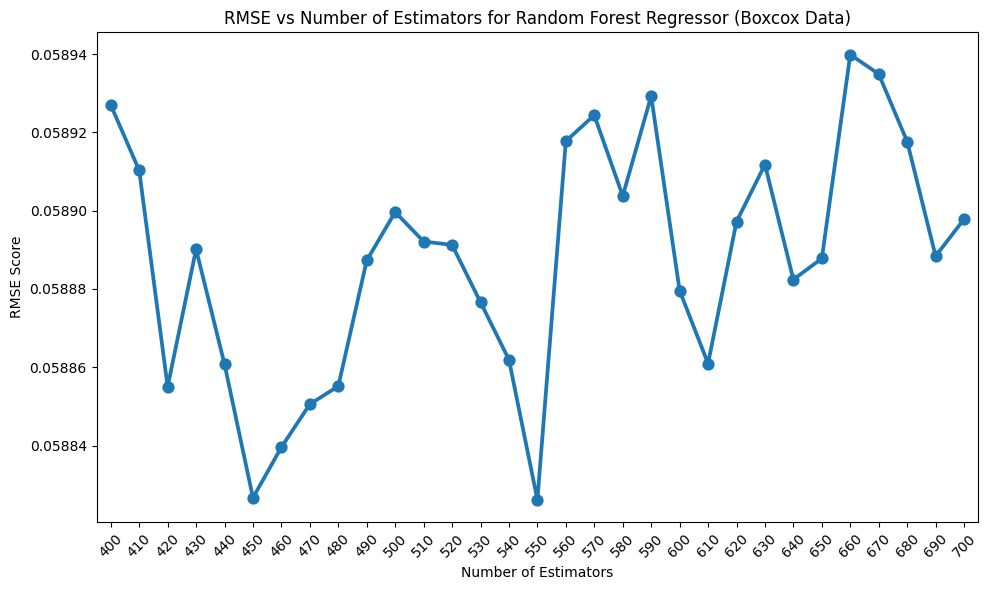

    n_estimators      RMSE
15           550  0.058826
5            450  0.058827
6            460  0.058840
7            470  0.058851
2            420  0.058855


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(400, 701, 10)  # Try values from 10 to 200 with step 10

for n_estimators in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_rf = rf_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_rf))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Plot RMSE scores against n_estimators
plt.figure(figsize=(10, 6))
sns.pointplot(x='n_estimators', y='RMSE', data=df_rmse)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for Random Forest Regressor (Boxcox Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 n_estimators values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan n_estimators dengan RMSE terkecil, yaitu 550, 450, dan 460.

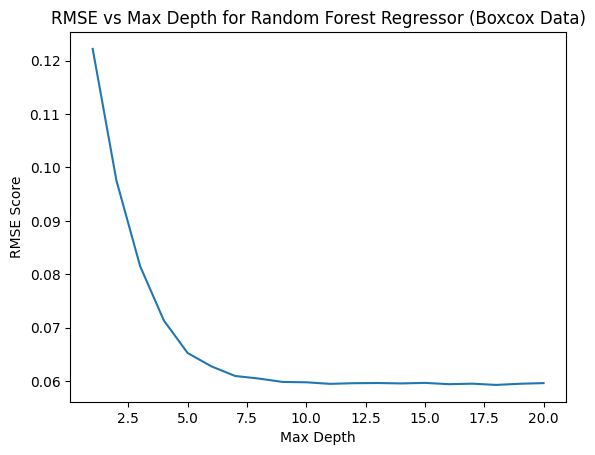

    max_depth      RMSE
17         18  0.059294
15         16  0.059434
10         11  0.059496
18         19  0.059512
16         17  0.059526


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_rf = rf_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for Random Forest Regressor (Boxcox Data)')
plt.show()

# Create DataFrame to store results
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display 5 max_depth with lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terkecil, yaitu 18, 16, dan 11.

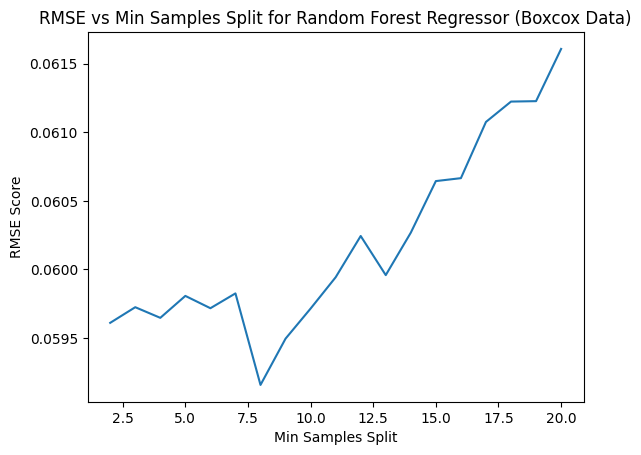

   min_samples_split      RMSE
6                  8  0.059157
7                  9  0.059494
0                  2  0.059610
2                  4  0.059646
8                 10  0.059714


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_split
min_samples_split_range = range(2, 21)  # Try values from 2 to 20

for min_samples_split in min_samples_split_range:
    rf_model = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    rf_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_rf = rf_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_split
plt.plot(min_samples_split_range, rmse_scores)
plt.xlabel('Min Samples Split')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Split for Random Forest Regressor (Boxcox Data)')
plt.show()

# Create DataFrame to store results
df_rmse = pd.DataFrame({'min_samples_split': min_samples_split_range, 'RMSE': rmse_scores})

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display 5 min_samples_split with lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan min_samples_split dengan RMSE terkecil, yaitu 8, 9, dan 2.

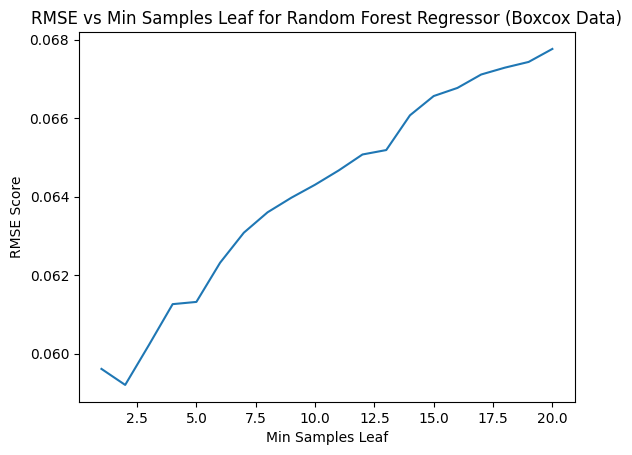

   min_samples_leaf      RMSE
1                 2  0.059201
0                 1  0.059610
2                 3  0.060218
3                 4  0.061260
4                 5  0.061316


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of min_samples_leaf
min_samples_leaf_range = range(1, 21)  # Try values from 1 to 20

for min_samples_leaf in min_samples_leaf_range:
    rf_model = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_rf = rf_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_rf))
    rmse_scores.append(rmse)

# Plot RMSE scores against min_samples_leaf
plt.plot(min_samples_leaf_range, rmse_scores)
plt.xlabel('Min Samples Leaf')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Min Samples Leaf for Random Forest Regressor (Boxcox Data)')
plt.show()

# Create DataFrame to store results
df_rmse = pd.DataFrame({'min_samples_leaf': min_samples_leaf_range, 'RMSE': rmse_scores})

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display 5 min_samples_leaf with lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan min_samples_leaf dengan RMSE terkecil, yaitu 2, 1, dan 3.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [550, 450, 460],
    'max_depth': [18, 16, 11],
    'min_samples_split': [8, 9, 2],
    'min_samples_leaf': [2, 1, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_boxcox, y_train_boxcox)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=550; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=450; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=450; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=450; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=460; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=4

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}
Best RMSE: 0.057052569192046355


In [139]:
# Buat model Random Forest dengan hyperparameter terbaik
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Latih model pada data pelatihan (boxcox)
best_rf_model.fit(x_train_boxcox, y_train_boxcox)

# Prediksi pada data pelatihan dan pengujian (boxcox)
y_pred_train_rf = best_rf_model.predict(x_train_boxcox)
y_pred_test_rf = best_rf_model.predict(x_test_boxcox)

# Kembalikan ke skala asli (karena data telah ditransformasi Box-Cox)
y_pred_train_rf_inv = inv_boxcox(y_pred_train_rf, lambda_boxcox)
y_pred_test_rf_inv = inv_boxcox(y_pred_test_rf, lambda_boxcox)
y_train_inv = inv_boxcox(y_train_boxcox, lambda_boxcox)  # Inverse transformasi data pelatihan
y_test_inv = inv_boxcox(y_test_boxcox, lambda_boxcox)    # Inverse transformasi data pengujian

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_inv, y_pred_train_rf_inv)
mae_train = mean_absolute_error(y_train_inv, y_pred_train_rf_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_rf_inv))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_inv, y_pred_test_rf_inv)
mae_test = mean_absolute_error(y_test_inv, y_pred_test_rf_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_rf_inv))

# Simpan hasil evaluasi model Decision Tree ke dalam dictionary 'results'
results['Random Forest Regressor Boxcox Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("Random Forest Regressor dengan Hyperparameter Terbaik (Data Boxcox):")
for metric_name, value in results['Random Forest Regressor Boxcox Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Random Forest Regressor dengan Hyperparameter Terbaik (Data Boxcox):
R-squared Train: 0.9721033589925028
R-squared Test: 0.8538998699433128
MAE Train: 6823.541573012158
MAE Test: 17820.248985668182
RMSE Train: 12899.260471654521
RMSE Test: 33475.89664889138



## Finetuning SVM

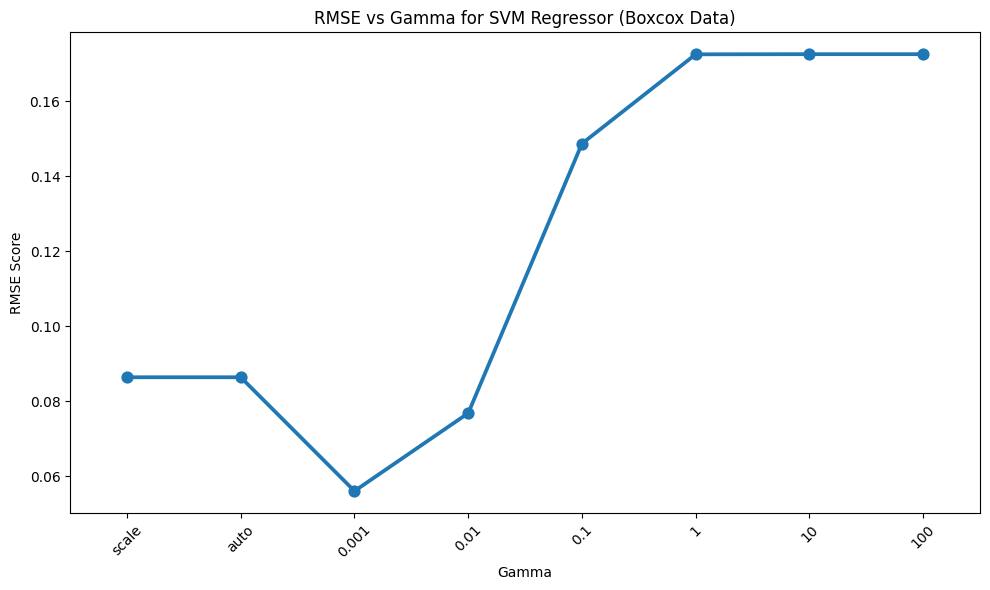

   gamma      RMSE
2  0.001  0.056050
3   0.01  0.076808
0  scale  0.086377
1   auto  0.086377
4    0.1  0.148642


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma
gamma_list = ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_list:
    svm_model = SVR(gamma=gamma)
    svm_model.fit(x_train_scaled, y_train_boxcox)
    y_pred_svm = svm_model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_svm))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_list, 'RMSE': rmse_scores})

# Plot RMSE scores against gamma
plt.figure(figsize=(10, 6))
sns.pointplot(x='gamma', y='RMSE', data=df_rmse)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for SVM Regressor (Boxcox Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 gamma values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan gamma dengan RMSE terkecil, yaitu 0.001, 0.01, dan scale.

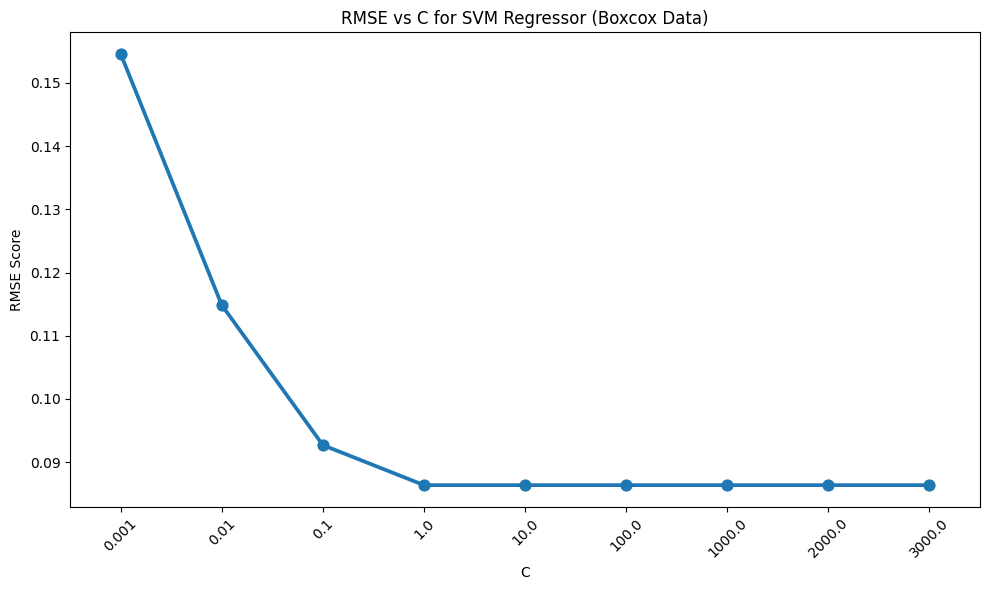

        C      RMSE
3     1.0  0.086377
4    10.0  0.086377
5   100.0  0.086377
6  1000.0  0.086377
7  2000.0  0.086377


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of C
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3000]  # Try different values of C

for c in c_list:
    svm_model = SVR(C=c)
    svm_model.fit(x_train_scaled, y_train_boxcox)
    y_pred_svm = svm_model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_svm))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'C': c_list, 'RMSE': rmse_scores})

# Plot RMSE scores against C
plt.figure(figsize=(10, 6))
sns.pointplot(x='C', y='RMSE', data=df_rmse)
plt.xlabel('C')
plt.ylabel('RMSE Score')
plt.title('RMSE vs C for SVM Regressor (Boxcox Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 C values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan C dengan RMSE terkecil, yaitu 1, 10, dan 100.

In [ ]:
# Define parameter grid
param_grid = {
    'gamma': [0.001, 0.01, 'scale'],
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create SVM model
svm_model = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_scaled, y_train_boxcox)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.4s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END .....................C=1, gamma=0.01, k

In [140]:
# Buat model SVM dengan hyperparameter terbaik
best_svm_model = SVR(
    gamma=best_params['gamma'],
    C=best_params['C'],
    kernel=best_params['kernel']
)

# Latih model pada data pelatihan (boxcox)
best_svm_model.fit(x_train_scaled, y_train_boxcox)

# Prediksi pada data pelatihan dan pengujian (boxcox)
y_pred_train_svm = best_svm_model.predict(x_train_scaled)
y_pred_test_svm = best_svm_model.predict(x_test_scaled)

# Kembalikan ke skala asli (karena data telah ditransformasi Box-Cox)
y_pred_train_svm_inv = inv_boxcox(y_pred_train_svm, lambda_boxcox)
y_pred_test_svm_inv = inv_boxcox(y_pred_test_svm, lambda_boxcox)
y_train_inv = inv_boxcox(y_train_boxcox, lambda_boxcox)  # Inverse transformasi data pelatihan
y_test_inv = inv_boxcox(y_test_boxcox, lambda_boxcox)    # Inverse transformasi data pengujian

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_inv, y_pred_train_svm_inv)
mae_train = mean_absolute_error(y_train_inv, y_pred_train_svm_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_svm_inv))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_inv, y_pred_test_svm_inv)
mae_test = mean_absolute_error(y_test_inv, y_pred_test_svm_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_svm_inv))

# Simpan hasil evaluasi model Support Vector ke dalam dictionary 'results'
results['Support Vector Regressor Boxcox Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("Support Vector Regressor dengan Hyperparameter Terbaik (Data Boxcox):")
for metric_name, value in results['Support Vector Regressor Boxcox Data with Tuning'].items():
    print(metric_name + ":", value)
print()

Support Vector Regressor dengan Hyperparameter Terbaik (Data Boxcox):
R-squared Train: 0.8796504583531457
R-squared Test: 0.8728117562368023
MAE Train: 17741.060054406073
MAE Test: 18911.169005602253
RMSE Train: 26792.36653106534
RMSE Test: 31234.20111645184



## Finetuning XGBoost

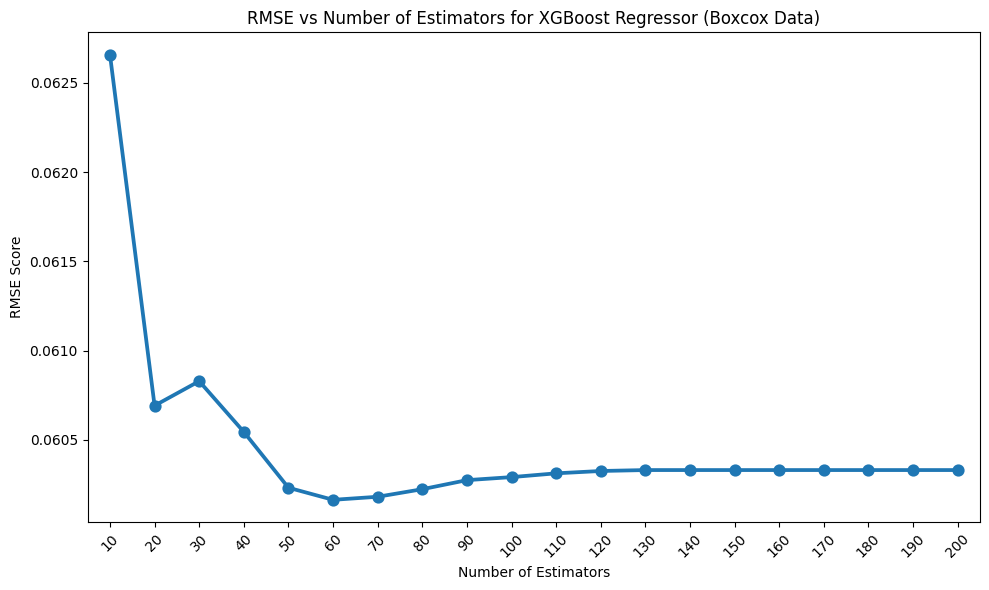

   n_estimators      RMSE
5            60  0.060165
6            70  0.060182
7            80  0.060224
4            50  0.060233
8            90  0.060275


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of n_estimators
n_estimators_range = range(10, 201, 10)  # Try values from 10 to 200 with step 10

for n_estimators in n_estimators_range:
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'n_estimators': n_estimators_range, 'RMSE': rmse_scores})

# Plot RMSE scores against n_estimators
plt.figure(figsize=(10, 6))
sns.pointplot(x='n_estimators', y='RMSE', data=df_rmse)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Number of Estimators for XGBoost Regressor (Boxcox Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 n_estimators values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan n_estimators dengan RMSE terkecil, yaitu 60, 70, dan 80.

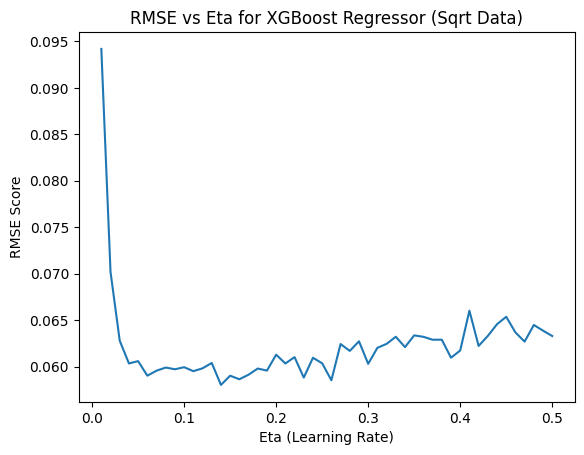

     eta      RMSE
13  0.14  0.058020
25  0.26  0.058520
15  0.16  0.058630
22  0.23  0.058811
14  0.15  0.059012


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of eta
eta_range = np.arange(0.01, 0.51, 0.01)  # Try values from 0.01 to 0.3 with step 0.01

for eta in eta_range:
    xgb_model = XGBRegressor(eta=eta, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'eta': eta_range, 'RMSE': rmse_scores})

# Plot RMSE scores against eta
plt.plot(eta_range, rmse_scores)
plt.xlabel('Eta (Learning Rate)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Eta for XGBoost Regressor (Sqrt Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 eta values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan eta dengan RMSE terkecil, yaitu 0.14, 0.26, dan 0.16.

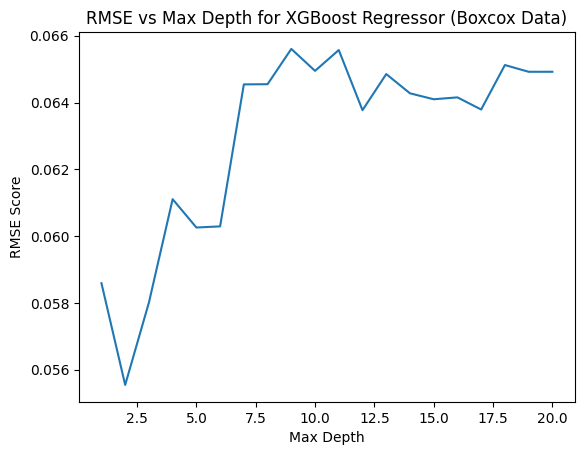

   max_depth      RMSE
1          2  0.055546
2          3  0.058012
0          1  0.058592
4          5  0.060259
5          6  0.060292


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of max_depth
max_depth_range = range(1, 21)  # Try depths from 1 to 20

for depth in max_depth_range:
    xgb_model = XGBRegressor(max_depth=depth, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Plot RMSE scores against max_depth
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Max Depth for XGBoost Regressor (Boxcox Data)')
plt.show()

# Create DataFrame to store results
df_rmse = pd.DataFrame({'max_depth': max_depth_range, 'RMSE': rmse_scores})

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display 5 max_depth with lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan max_depth dengan RMSE terkecil, yaitu 2, 3, dan 1.

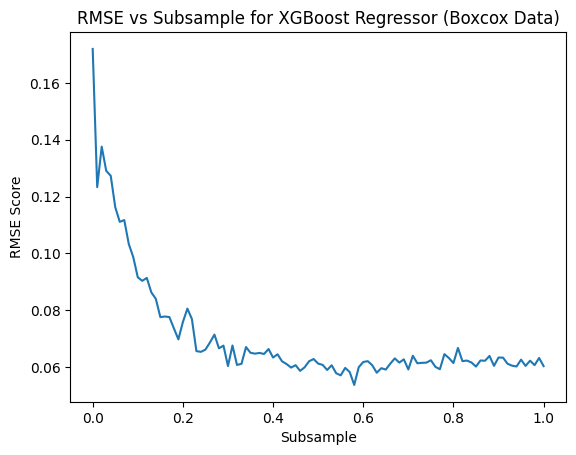

    subsample      RMSE
58       0.58  0.053670
55       0.55  0.057041
54       0.54  0.057785
63       0.63  0.057958
57       0.57  0.058190


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of subsample
subsample_range = np.arange(0, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for subsample in subsample_range:
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'subsample': subsample_range, 'RMSE': rmse_scores})

# Plot RMSE scores against subsample
plt.plot(subsample_range, rmse_scores)
plt.xlabel('Subsample')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Subsample for XGBoost Regressor (Boxcox Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 subsample values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan subsample dengan RMSE terkecil, yaitu 0.58, 0.55, dan 0.54.

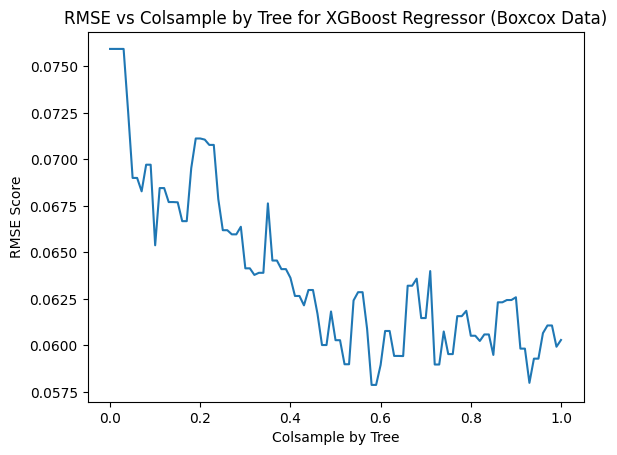

    colsample_bytree      RMSE
59              0.59  0.057877
58              0.58  0.057877
93              0.93  0.057989
60              0.60  0.058950
72              0.72  0.058974


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of colsample_bytree
colsample_bytree_range = np.arange(0, 1.01, 0.01)  # Try values from 0.1 to 1.0 with step 0.1

for colsample_bytree in colsample_bytree_range:
    xgb_model = XGBRegressor(colsample_bytree=colsample_bytree, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'colsample_bytree': colsample_bytree_range, 'RMSE': rmse_scores})

# Plot RMSE scores against colsample_bytree
plt.plot(colsample_bytree_range, rmse_scores)
plt.xlabel('Colsample by Tree')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Colsample by Tree for XGBoost Regressor (Boxcox Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 colsample_bytree values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan colsample_bytree dengan RMSE terkecil, yaitu 0.59, 0.58, dan 0.93.

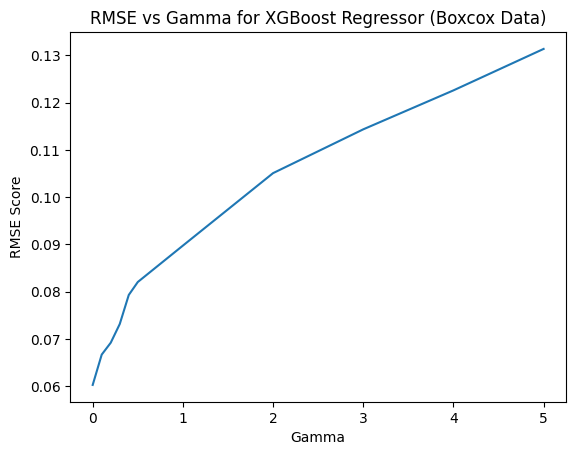

   gamma      RMSE
0    0.0  0.060292
1    0.1  0.066703
2    0.2  0.069213
3    0.3  0.073167
4    0.4  0.079312


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of gamma
gamma_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]  # Adjust the range as needed

for gamma in gamma_range:
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'gamma': gamma_range, 'RMSE': rmse_scores})

# Plot RMSE scores against gamma
plt.plot(gamma_range, rmse_scores)
plt.xlabel('Gamma')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Gamma for XGBoost Regressor (Boxcox Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 gamma values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

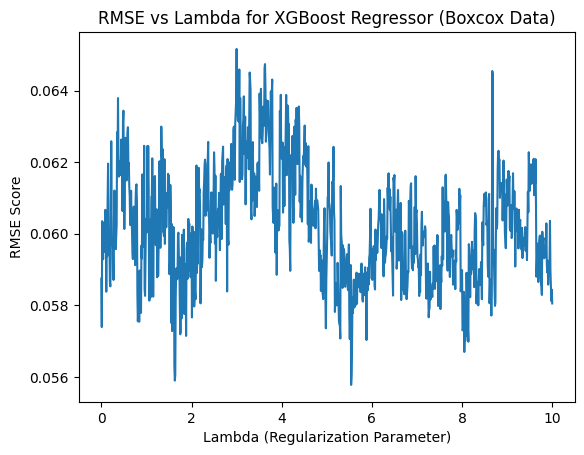

     lambda      RMSE
554    5.54  0.055780
163    1.63  0.055901
164    1.64  0.056054
555    5.55  0.056064
162    1.62  0.056308


In [ ]:
# List to store RMSE scores
rmse_scores = []

# Try different values of lambda (reg_lambda in XGBoost)
lambda_range = np.arange(0, 10.01, 0.01)  # Try values from 0 to 1 with step 0.01

for lambda_val in lambda_range:
    xgb_model = XGBRegressor(reg_lambda=lambda_val, random_state=42)
    xgb_model.fit(x_train_boxcox, y_train_boxcox)
    y_pred_xgb = xgb_model.predict(x_test_boxcox)
    rmse = np.sqrt(mean_squared_error(y_test_boxcox, y_pred_xgb))
    rmse_scores.append(rmse)

# Create a DataFrame for plotting
df_rmse = pd.DataFrame({'lambda': lambda_range, 'RMSE': rmse_scores})

# Plot RMSE scores against lambda
plt.plot(lambda_range, rmse_scores)
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('RMSE Score')
plt.title('RMSE vs Lambda for XGBoost Regressor (Boxcox Data)')
plt.show()

# Sort DataFrame by RMSE score (ascending)
df_rmse_sorted = df_rmse.sort_values('RMSE')

# Display the 5 lambda values with the lowest RMSE scores
print(df_rmse_sorted.head(5))

Gunakan lambda dengan RMSE terkecil, yaitu 5.54, 1.63, dan 1.64.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [60, 70, 80],
    'eta': [0.14, 0.26, 0.16],
    'max_depth': [2, 3, 1],
    'subsample': [0.58, 0.55, 0.54],
    'colsample_bytree': [0.59, 0.58, 0.93],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [5.54, 1.63, 1.64],
}

# Create XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(x_train_boxcox, y_train_boxcox)

# Get best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Streaming output truncated to the last 5000 lines.
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.58; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.58; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.58; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.55; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.55; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.55; total time=   0.1s
[CV] END colsample_bytree=0.59, eta=0.16, gamma=0, max_depth=3, n_estimators=60, reg_lambda=1.64, subsample=0.54; total time=   0.1s
[CV] END colsample

In [141]:
# Buat model XGBoost dengan hyperparameter terbaik
best_xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    eta=best_params['eta'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_lambda=best_params['reg_lambda'],
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)

# Latih model pada data pelatihan (boxcox)
best_xgb_model.fit(x_train_boxcox, y_train_boxcox)

# Prediksi pada data pelatihan dan pengujian (boxcox)
y_pred_train_xgb = best_xgb_model.predict(x_train_boxcox)
y_pred_test_xgb = best_xgb_model.predict(x_test_boxcox)

# Kembalikan ke skala asli (karena data telah ditransformasi Box-Cox)
y_pred_train_xgb_inv = inv_boxcox(y_pred_train_xgb, lambda_boxcox)
y_pred_test_xgb_inv = inv_boxcox(y_pred_test_xgb, lambda_boxcox)
y_train_inv = inv_boxcox(y_train_boxcox, lambda_boxcox)  # Inverse transformasi data pelatihan
y_test_inv = inv_boxcox(y_test_boxcox, lambda_boxcox)    # Inverse transformasi data pengujian

# Evaluasi model pada data pelatihan
r2_train = r2_score(y_train_inv, y_pred_train_xgb_inv)
mae_train = mean_absolute_error(y_train_inv, y_pred_train_xgb_inv)
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_xgb_inv))

# Evaluasi model pada data pengujian
r2_test = r2_score(y_test_inv, y_pred_test_xgb_inv)
mae_test = mean_absolute_error(y_test_inv, y_pred_test_xgb_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_xgb_inv))

# Simpan hasil evaluasi model XGBoost ke dalam dictionary 'results'
results['XGBoost Boxcox Data with Tuning'] = {
    'R-squared Train': r2_train,
    'R-squared Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test
}

# Print results
print("XGBoost dengan Hyperparameter Terbaik (Data Boxcox):")
for metric_name, value in results['XGBoost Boxcox Data with Tuning'].items():
    print(metric_name + ":", value)
print()

XGBoost dengan Hyperparameter Terbaik (Data Boxcox):
R-squared Train: 0.9103691191196387
R-squared Test: 0.8830756313613002
MAE Train: 13997.960185011765
MAE Test: 17659.01042112587
RMSE Train: 23121.589577581446
RMSE Test: 29947.421408666032



# Finetuning Deep Learning

In [95]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [99]:
!pip install --upgrade scikit-learn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Definisikan fungsi pembuat model
def create_model(optimizer='adam', init='uniform', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=x_train_scaled.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['RootMeanSquaredError'])
    return model

# Buat KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Definisikan parameter grid
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
    'optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.0, 0.1, 0.2]
}

# Inisialisasi GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, scoring='neg_root_mean_squared_error')

# Fit GridSearchCV
grid.fit(x_train_scaled, y_train_log)

# Cetak hasil terbaik
print("Best parameters found: ", grid.best_params_)
print("Best CV score: ", -grid.best_score_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best parameters found:  {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.2, 'optimizer': 'rmsprop'}
Best CV score:  0.30781574202320877


In [ ]:
# Bangun model dengan hyperparameter terbaik
best_model = create_model(optimizer=grid.best_params_['optimizer'],
                          dropout_rate=grid.best_params_['model__dropout_rate'])

# Latih model pada data pelatihan
history = best_model.fit(x_train_scaled, y_train_log,
                        epochs=450,
                        batch_size=grid.best_params_['batch_size'],
                        validation_data=(x_test_scaled, y_test_log))

# Prediksi pada data pelatihan dan pengujian
y_pred_train_dl = best_model.predict(x_train_scaled)
y_pred_test_dl = best_model.predict(x_test_scaled)

# Kembalikan ke skala asli (karena data dilogaritma sebelumnya)
y_pred_train_dl_exp = np.expm1(y_pred_train_dl).flatten()
y_pred_test_dl_exp = np.expm1(y_pred_test_dl).flatten()

# Evaluasi model pada data pelatihan
r2_train = r2_score(np.expm1(y_train_log), y_pred_train_dl_exp)
mae_train = mean_absolute_error(np.expm1(y_train_log), y_pred_train_dl_exp)
rmse_train = np.sqrt(mean_squared_error(np.expm1(y_train_log), y_pred_train_dl_exp))

# Evaluasi model pada data pengujian
r2_test = r2_score(np.expm1(y_test_log), y_pred_test_dl_exp)
mae_test = mean_absolute_error(np.expm1(y_test_log), y_pred_test_dl_exp)
rmse_test = np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred_test_dl_exp))

# Tampilkan hasil evaluasi
print("Deep Learning Model dengan Hyperparameter Terbaik:")
print("------ Data Pelatihan ------")
print("R-squared:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("------ Data Pengujian ------")
print("R-squared:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

Epoch 1/750


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - RootMeanSquaredError: 11.4346 - loss: 130.9863 - val_RootMeanSquaredError: 6.5228 - val_loss: 42.5473
Epoch 2/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 5.3043 - loss: 28.5499 - val_RootMeanSquaredError: 2.8601 - val_loss: 8.1800
Epoch 3/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 2.9373 - loss: 8.6360 - val_RootMeanSquaredError: 2.1278 - val_loss: 4.5277
Epoch 4/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 2.4585 - loss: 6.0540 - val_RootMeanSquaredError: 1.8381 - val_loss: 3.3785
Epoch 5/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - RootMeanSquaredError: 2.2273 - loss: 4.9665 - val_RootMeanSquaredError: 1.7916 - val_loss: 3.2097
Epoch 6/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 2.0674 - loss: 4.2775 - val_RootMeanSquaredError: 1.7347 - val_loss: 3.0091
Epoch 7/750
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 2.0977 - loss: 4.4379 - va

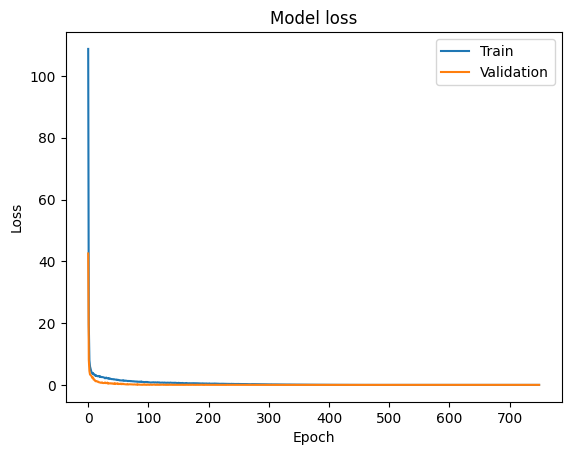

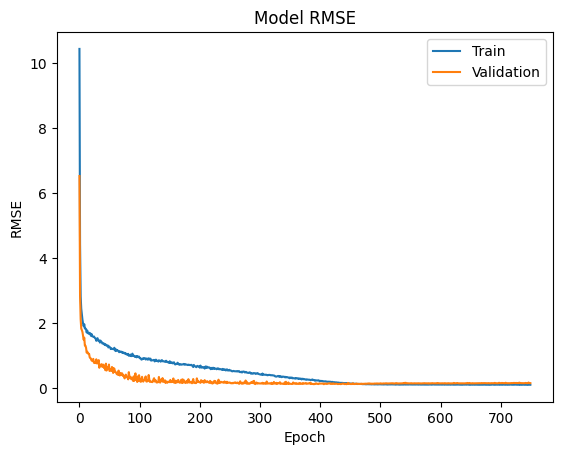

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation RMSE values
plt.plot(history.history['RootMeanSquaredError'])
plt.plot(history.history['val_RootMeanSquaredError'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Final Result

In [147]:
results

{'Log Data Without Tuning': {'Linear Regression Log Data': {'R-squared Train': 0.826248411880321,
   'R-squared Test': 0.888259843238002,
   'MAE Train': 17055.24823508198,
   'MAE Test': 18690.984952213115,
   'RMSE Train': 32192.391972404886,
   'RMSE Test': 29275.98764869858},
  'Decision Tree Regressor Log Data': {'R-squared Train': 0.9999950546798204,
   'R-squared Test': 0.7685193724939626,
   'MAE Train': 7.106164383561694,
   'MAE Test': 26021.908692735848,
   'RMSE Train': 171.74577536298406,
   'RMSE Test': 42137.06116491373},
  'Random Forest Regressor Log Data': {'R-squared Train': 0.9770332773778783,
   'R-squared Test': 0.8866152526522073,
   'MAE Train': 6609.160403862192,
   'MAE Test': 16988.66596814841,
   'RMSE Train': 11704.109284258242,
   'RMSE Test': 29490.64256805989},
  'SVR Log Data': {'R-squared Train': 0.961465205417767,
   'R-squared Test': 0.7804530742847621,
   'MAE Train': 11914.287937899397,
   'MAE Test': 20001.471573203795,
   'RMSE Train': 15160.5647

Best Model: **Support Vector Machine Regression With Tuning Using Log Transformation**.

R-squared: 0.9147802618074786

Mean Absolute Error: 15861.569754570079

Root Mean Squared Error: 25566.83772443754